In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# A. An overview of the dataset

#### 1.Import the data as a pandas DataFrame into your notebook.

In [2]:
# getting the data
df = pd.read_pickle('data_385k.pkl', compression='zip')

#### 2.Check the number of rows and columns. You should have 385’384 samples and 99 columns.

In [3]:
df.shape[0] #number of rows

385384

In [4]:
df.shape[1] #number of columns

99

In [5]:
df.shape 

(385384, 99)

#### 3.Display a few entries from the DataFrame.

In [6]:
df.head(5) # Show the first 5 entries 

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,...,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
0,0.0,8001772000030,NaN,NaN,75.00,37.50,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,7610809001066,NaN,NaN,1.50,1.13,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,8002530159021,NaN,NaN,52.68,NaN,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,3033715065788,NaN,NaN,70.40,11.97,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,7610848492740,NaN,NaN,37.00,7.40,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 4.Check the data type for each column. Create separate lists to hold the names of columns of the same data type.

In [7]:
df.info() # show data type for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385384 entries, 0 to 385383
Data columns (total 99 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   alcohol_by_volume                                385384 non-null  float64
 1   barcode                                          385384 non-null  object 
 2   calcium_per_hundred                              264979 non-null  float64
 3   calcium_unit                                     265086 non-null  object 
 4   carbohydrates_per_hundred                        351551 non-null  float64
 5   carbohydrates_per_portion                        11480 non-null   float64
 6   carbohydrates_unit                               351828 non-null  object 
 7   cholesterol_per_hundred                          270282 non-null  float64
 8   cholesterol_unit                                 270329 non-null  object 
 9   copper_cu_per_h

In [8]:
# In previous line of code, we can see 3 types of data : float64(50), int64(1), object(48)
# lists to hold column names of each data type
int_cols = []
str_cols = []
float_cols = []

# loop through columns type and categorize them 
for col in df.columns:
    if df[col].dtype == 'int64':
        int_cols.append(col)
    elif df[col].dtype == 'float64':
        float_cols.append(col)
    elif df[col].dtype == 'object':
        str_cols.append(col)

# print out lists
print(f'Integer Columns: {int_cols}')
print(f'\nFloat Columns: {float_cols}')
print(f'\nString Columns: {str_cols}')

Integer Columns: ['id']

Float Columns: ['alcohol_by_volume', 'calcium_per_hundred', 'carbohydrates_per_hundred', 'carbohydrates_per_portion', 'cholesterol_per_hundred', 'copper_cu_per_hundred', 'energy_kcal_per_hundred', 'energy_kcal_per_portion', 'energy_per_hundred', 'energy_per_portion', 'fat_per_hundred', 'fat_per_portion', 'fatty_acids_total_saturated_per_hundred', 'fatty_acids_total_trans_per_hundred', 'fiber_insoluble_per_hundred', 'fiber_per_hundred', 'fiber_per_portion', 'fiber_soluble_per_hundred', 'folate_total_per_hundred', 'folic_acid_per_hundred', 'iron_per_hundred', 'magnesium_per_hundred', 'manganese_mn_per_hundred', 'monounsaturated_fatty_acids_per_hundred', 'phosphorus_per_hundred', 'polyunsaturated_fatty_acids_per_hundred', 'portion_quantity', 'potassium_k_per_hundred', 'protein_per_hundred', 'protein_per_portion', 'quantity', 'salt_per_hundred', 'salt_per_portion', 'saturated_fat_per_hundred', 'saturated_fat_per_portion', 'sodium_per_hundred', 'sodium_per_portion',

#### 5. Check the data by the type of information they hold. Create 3 lists that hold _per_hundred, _per_portion and _unit columns. Put the remaining column names in a 4th list named other_cols.

In [9]:
# lists to hold column names of each data type
per_hundred_cols = []
per_portion_cols = []
unit_cols = []
other_cols = []

# loop through column's names and categorize them 
for col in df.columns:
    if col.endswith("per_hundred"):
        per_hundred_cols.append(col)
    elif col.endswith("_per_portion"):
        per_portion_cols.append(col)
    elif col.endswith("_unit"):
        unit_cols.append(col)
    else:
        other_cols.append(col)

# print out lists
print(f'per_hundred columns: {per_hundred_cols}')
print(f'\nper_portion columns: {per_portion_cols}')
print(f'\nunit columns: {unit_cols}')
print(f'\nother columns: {other_cols}')

per_hundred columns: ['calcium_per_hundred', 'carbohydrates_per_hundred', 'cholesterol_per_hundred', 'copper_cu_per_hundred', 'energy_kcal_per_hundred', 'energy_per_hundred', 'fat_per_hundred', 'fatty_acids_total_saturated_per_hundred', 'fatty_acids_total_trans_per_hundred', 'fiber_insoluble_per_hundred', 'fiber_per_hundred', 'fiber_soluble_per_hundred', 'folate_total_per_hundred', 'folic_acid_per_hundred', 'iron_per_hundred', 'magnesium_per_hundred', 'manganese_mn_per_hundred', 'monounsaturated_fatty_acids_per_hundred', 'phosphorus_per_hundred', 'polyunsaturated_fatty_acids_per_hundred', 'potassium_k_per_hundred', 'protein_per_hundred', 'salt_per_hundred', 'saturated_fat_per_hundred', 'sodium_per_hundred', 'sugars_added_per_hundred', 'sugars_per_hundred', 'vitamin_a_iu_per_hundred', 'vitamin_b12_cobalamin_per_hundred', 'vitamin_b1_thiamin_per_hundred', 'vitamin_b2_riboflavin_per_hundred', 'vitamin_b3_niacin_per_hundred', 'vitamin_b5_panthothenic_acid_per_hundred', 'vitamin_b6_pyridoxi

# B. Preliminary Exploratory Data Analysis

#### 1. Are there any duplicated products in the data? Can you remove them? What is the shape of the remaining data?

In [10]:
df.duplicated().sum() # number of duplicated rows

10500

In [11]:
df = df.drop_duplicates() # drop duplicated rows

In [12]:
df.shape #  shape of the data

(374884, 99)

#### 2.Show the proportion of missing values in the data using appropriate visualizations and numerical summaries.

* Create a table that ranks the number and percentage of missing values for all columns.

In [13]:
pd.options.display.max_rows = 100 # show all the names in the table
qty_null_values = df.isnull().sum().sort_values(ascending = False) #count the number null values
percent_null_values = (qty_null_values/df.shape[0])*100 
df_null_values = pd.concat([qty_null_values, percent_null_values.round(1)], axis=1, keys=['qty_null_values', 'percent_null_values'])
df_null_values

,qty_null_values,percent_null_values
sodium_per_portion,374131,99.8
fiber_insoluble_per_hundred,371375,99.1
fiber_insoluble_unit,371374,99.1
manganese_mn_per_hundred,371350,99.1
manganese_mn_unit,371347,99.1
copper_cu_per_hundred,371273,99.0
copper_cu_unit,371273,99.0
fiber_soluble_per_hundred,371057,99.0
fiber_soluble_unit,371055,99.0
folic_acid_per_hundred,370428,98.8


* Use the missingno library to visualize where the missing are located in the whole data frame and how they relate to each other. Comment on what you observe.

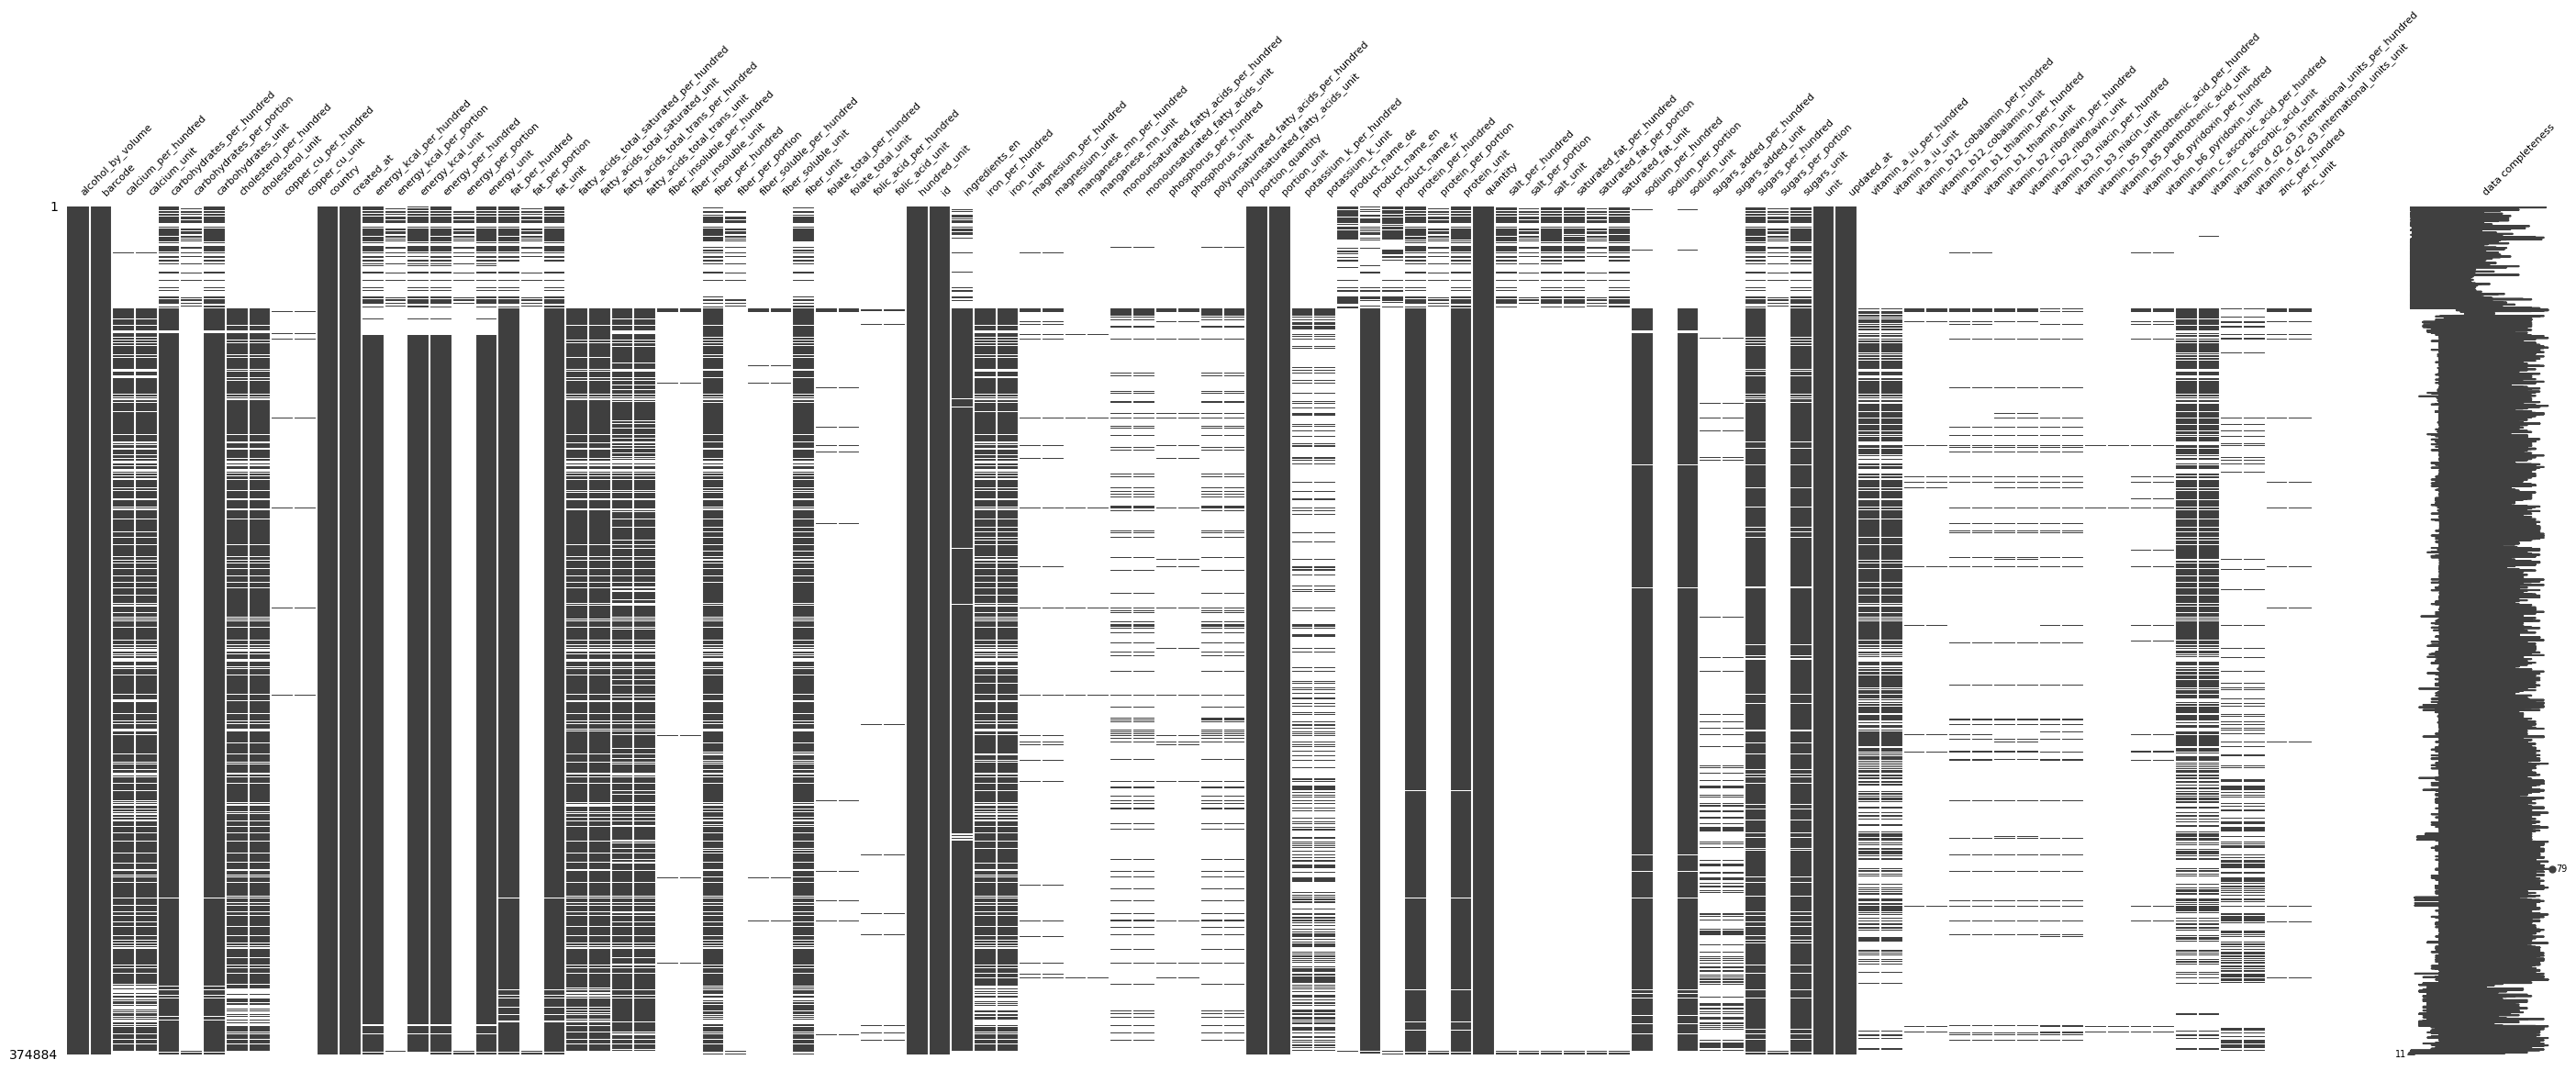

In [14]:
import missingno as msno
msno.matrix(df, labels=True, fontsize=8, figsize=(35,12));

The previous plot allows us to visualize the missing data in the entire dataframe. Here are my observations:

- The completeness of data falls between 11 columns (minimum) and 79 columns (maximum).
- There are two types of columns:
    - columns where data appears to be complete, such as barcode, country, created_at, etc.
    - columns where data appears to be almost empty, such as copper_cu_per_hundred, fiber_insoluble_per_hundred, manganese_mm_per_hundred.
- The first few rows seem to be different from the rest of the data.

* Create 4 line plots or bar charts that show the percentages of missing values in the 4 lists you created in A.5.

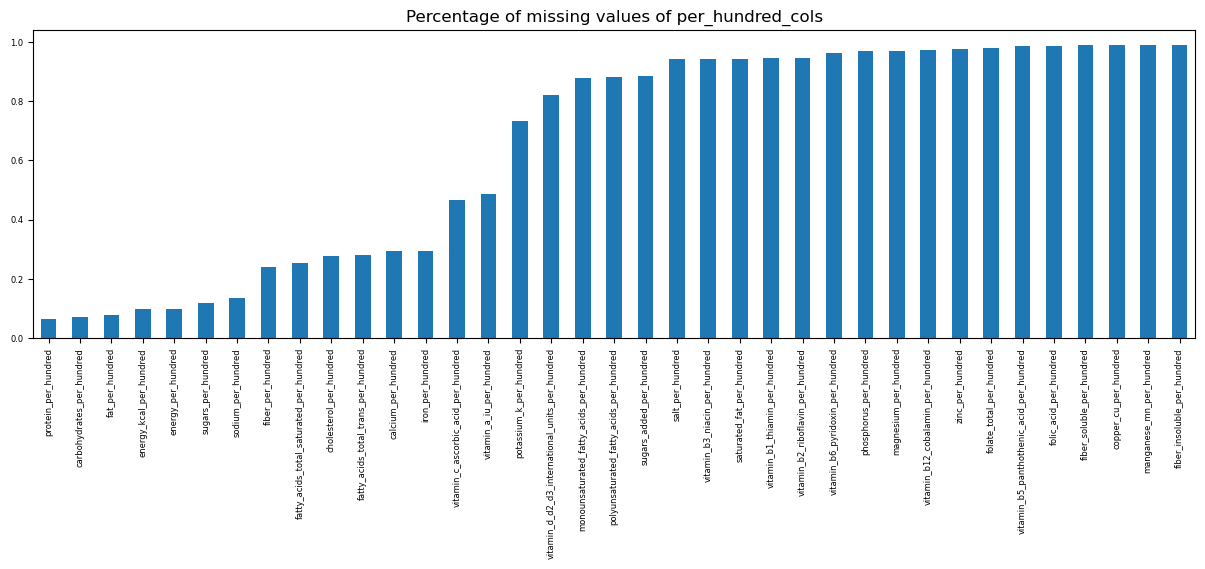

In [15]:
df[per_hundred_cols].isna().mean().sort_values().plot(kind="bar", figsize=(15, 4), title="Percentage of missing values of per_hundred_cols", fontsize=6); 

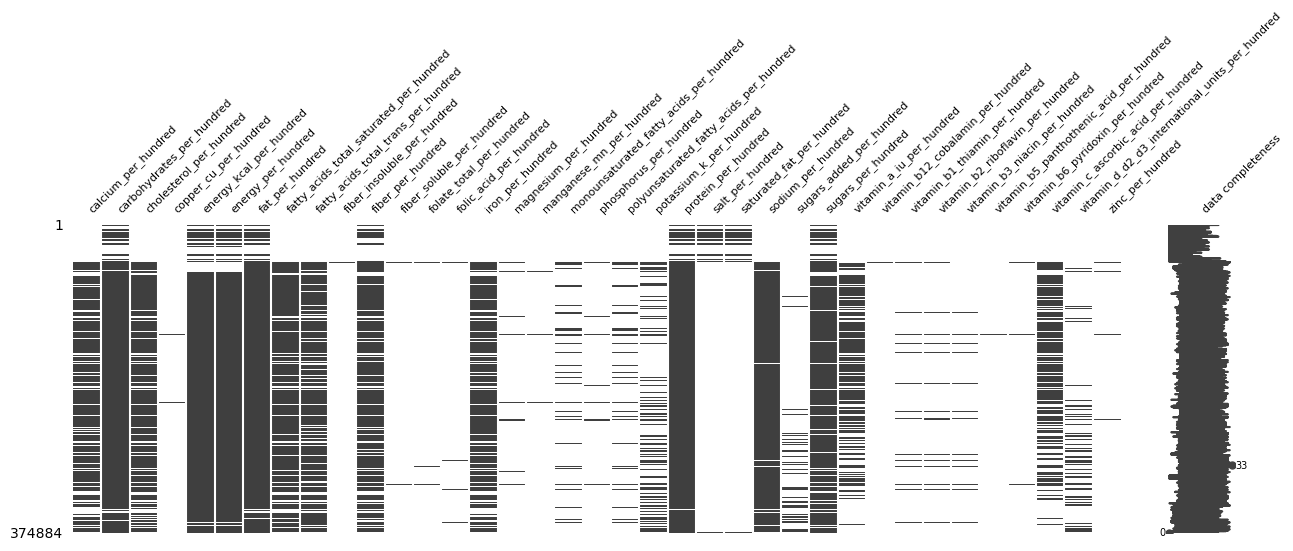

In [16]:
msno.matrix(df[per_hundred_cols], labels=True, fontsize=8,figsize=(15, 4));

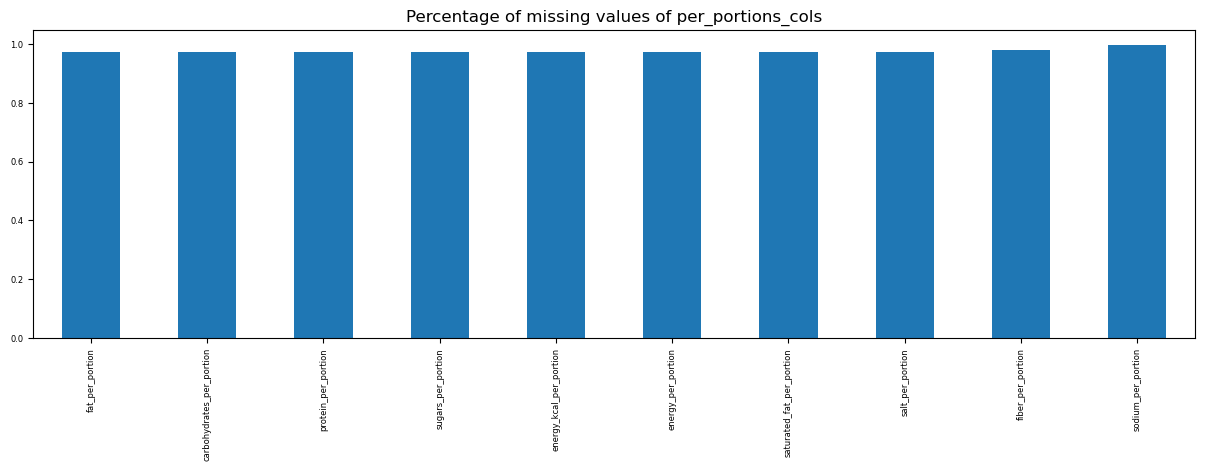

In [17]:
df[per_portion_cols].isna().mean().sort_values().plot(kind="bar", figsize=(15, 4), title="Percentage of missing values of per_portions_cols", fontsize=6);

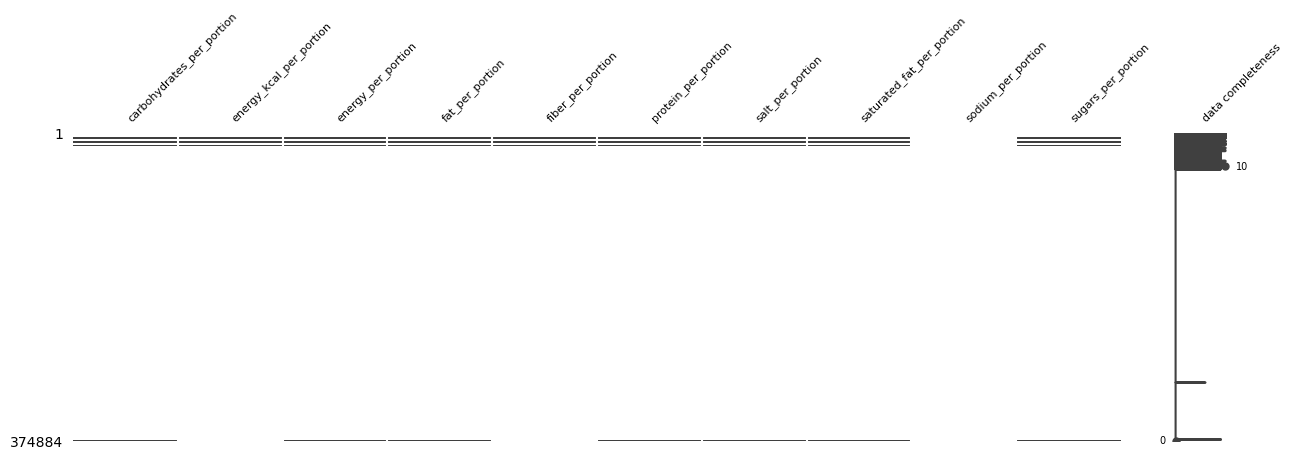

In [18]:
msno.matrix(df[per_portion_cols], labels=True, fontsize=8, figsize=(15, 4));

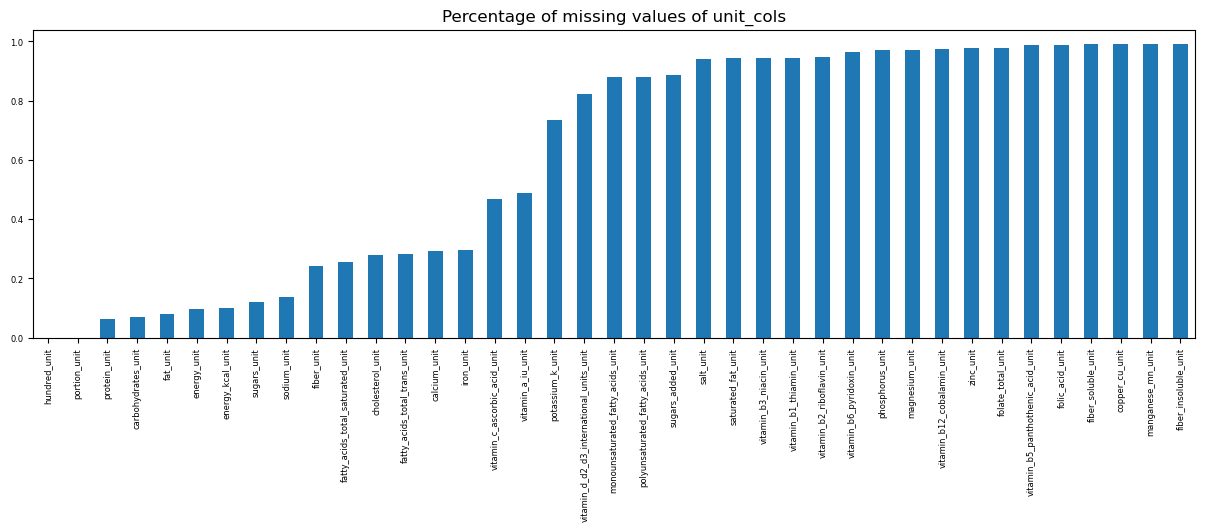

In [19]:
df[unit_cols].isna().mean().sort_values().plot(kind="bar", figsize=(15, 4), title="Percentage of missing values of unit_cols", fontsize=6);

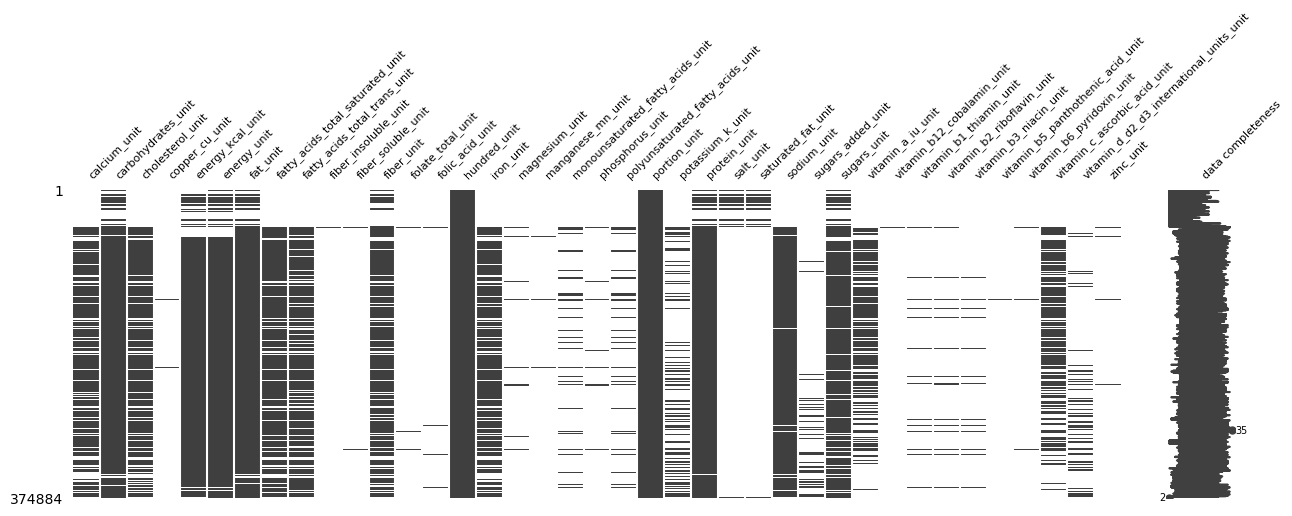

In [20]:
msno.matrix(df[unit_cols], labels=True, fontsize=8, figsize=(15, 4));

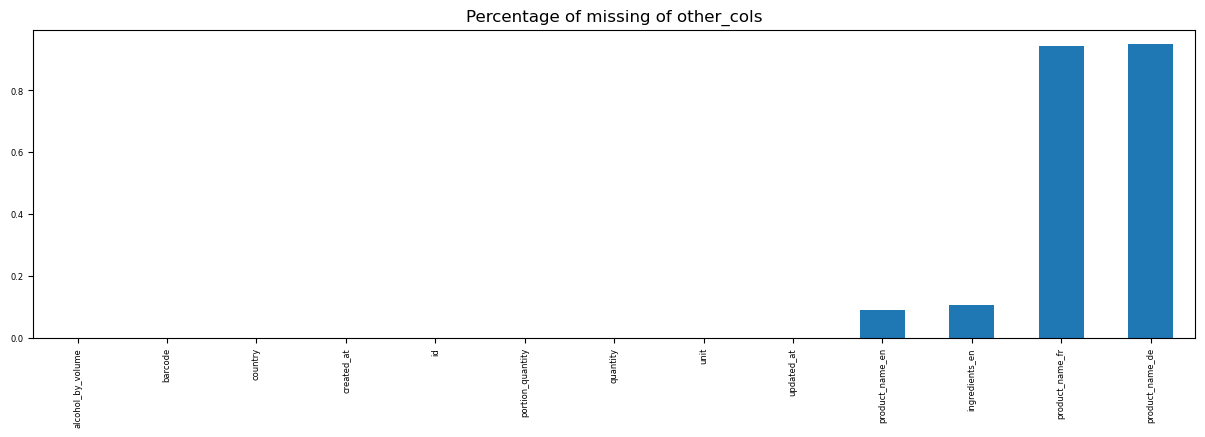

In [21]:
df[other_cols].isna().mean().sort_values().plot(kind="bar", figsize=(15, 4), title="Percentage of missing of other_cols", fontsize=6);

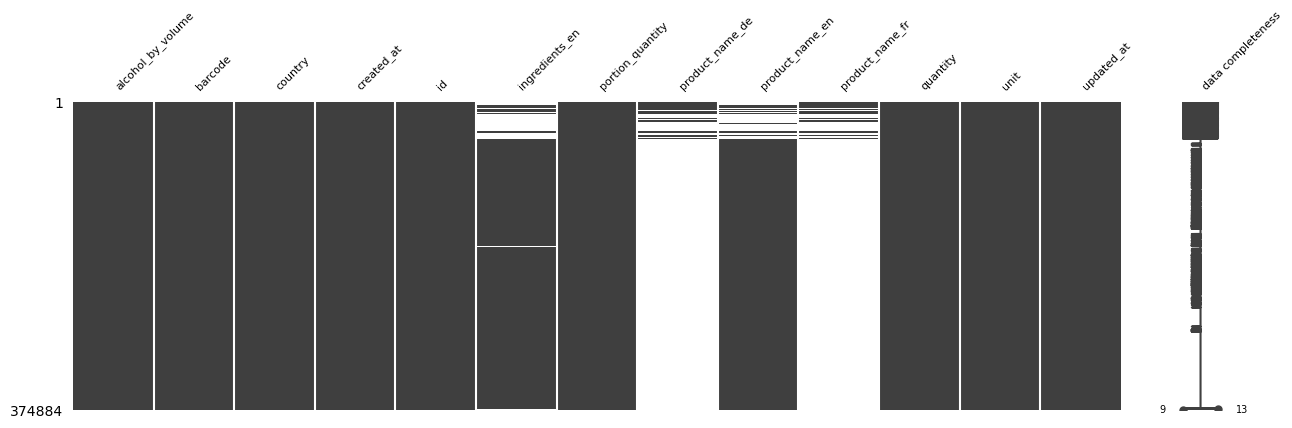

In [22]:
msno.matrix(df[other_cols], labels=True, fontsize=8, figsize=(15, 4));

Upon analyzing these four lists, there are noticeable differences between them. 
Firstly, in the 'per_hundred_cols' list, the data appears to be the most comprehensive. Although some columns are empty, this seems to be because the ingredient is not present in the product. 
Secondly, in the 'per_portion_cols' list, there is a significant amount of missing data. 
Thirdly, the 'unit_cols' list has many empty values, and it is unclear whether they are missing or just because there is no product in the row. 
Lastly, the 'other_cols' list appears to have consistent data, with the product name being filled in for FR or DE when EN is missing.

#### 3.Now that you know the extent of missing values in the data, you should address them. Your goal is to keep as much data as possible in your DataFrame. What is the shape of the remaining data?

* a) As a first step, remove rows and columns that are completely empty (if there is any).

In [23]:
qty_null_values = df.isnull().sum().sort_values(ascending = False)
percent_null_values = (qty_null_values/df.shape[0])*100
df_null_values = pd.concat([qty_null_values, percent_null_values.round(1)], axis=1, keys=['qty_null_values', 'percent_null_values'])
df_null_values.head()

,qty_null_values,percent_null_values
sodium_per_portion,374131,99.8
fiber_insoluble_per_hundred,371375,99.1
fiber_insoluble_unit,371374,99.1
manganese_mn_per_hundred,371350,99.1
manganese_mn_unit,371347,99.1


In [24]:
qty_null_values = df.isnull().sum(axis=1).sort_values(ascending = False)
percent_null_values = (qty_null_values/df.shape[1])*100
df_null_values = pd.concat([qty_null_values, percent_null_values.round(1)], axis=1, keys=['qty_null_values', 'percent_null_values'])
df_null_values.head()

,qty_null_values,percent_null_values
374883,88,88.9
28232,88,88.9
28285,88,88.9
28284,88,88.9
28274,88,88.9


Using the same methodology as in question B-2-a, I generated a table that displays the missing values in both columns and rows. Interestingly, we did not find any empty rows or columns in the dataframe.

* b) Start with your list of _unit columns, and check some of them and show what information they hold. One simple approach to fill up missing values in categorical columns is to use the most frequent value as a proxy for the missing value. Apply this approach to the _unit columns.

In [25]:
df[unit_cols].head()

,calcium_unit,carbohydrates_unit,cholesterol_unit,copper_cu_unit,energy_kcal_unit,energy_unit,fat_unit,fatty_acids_total_saturated_unit,fatty_acids_total_trans_unit,fiber_insoluble_unit,...,vitamin_a_iu_unit,vitamin_b12_cobalamin_unit,vitamin_b1_thiamin_unit,vitamin_b2_riboflavin_unit,vitamin_b3_niacin_unit,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_unit,zinc_unit
0,NaN,g,NaN,NaN,kCal,kJ,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,g,NaN,NaN,kCal,kJ,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,g,NaN,NaN,kCal,kJ,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,g,NaN,NaN,kCal,kJ,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,g,NaN,NaN,kCal,kJ,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df = df.copy()
for col in df[unit_cols].columns:
    df.loc[:, col].fillna(df[col].value_counts().idxmax(), inplace=True)

In [27]:
df[unit_cols].head()

,calcium_unit,carbohydrates_unit,cholesterol_unit,copper_cu_unit,energy_kcal_unit,energy_unit,fat_unit,fatty_acids_total_saturated_unit,fatty_acids_total_trans_unit,fiber_insoluble_unit,...,vitamin_a_iu_unit,vitamin_b12_cobalamin_unit,vitamin_b1_thiamin_unit,vitamin_b2_riboflavin_unit,vitamin_b3_niacin_unit,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_unit,zinc_unit
0,mg,g,mg,mg,kCal,kJ,g,g,g,g,...,IU,µg,mg,mg,mg,mg,mg,mg,IU,mg
1,mg,g,mg,mg,kCal,kJ,g,g,g,g,...,IU,µg,mg,mg,mg,mg,mg,mg,IU,mg
2,mg,g,mg,mg,kCal,kJ,g,g,g,g,...,IU,µg,mg,mg,mg,mg,mg,mg,IU,mg
3,mg,g,mg,mg,kCal,kJ,g,g,g,g,...,IU,µg,mg,mg,mg,mg,mg,mg,IU,mg
4,mg,g,mg,mg,kCal,kJ,g,g,g,g,...,IU,µg,mg,mg,mg,mg,mg,mg,IU,mg


* c) As a second strategy, let’s fill up the missing values of a column using other columns that hold similar information. Apply this approach to the product_name_en. Find columns that hold similar information and use them to replace the missing value in product_name_en. Report the number of rows that you managed to fill up.

In [28]:
df[['product_name_de','product_name_en','product_name_fr']].head(10)

,product_name_de,product_name_en,product_name_fr
0,Bio Spaghetti,Bio Spaghetti,Spaghetti Bio
1,Naturaplan Mozzarella,Naturaplan Mozzarella,Naturaplan Mozzarella
2,Caffè Mauro - Bio Kaffe,Caffè Mauro - Roasted organic coffee blend,Caffè Mauro - café bio
3,Le chocolat Cailler - schokoladenpulver,Le chocolat Cailler - chocolate powder,Le chocolat Cailler - chocolat en poudre
4,Naturaplan ExtraDunkle Schokolade 70%,Naturaplan Extra Dark Chocolate 70%,Naturaplan Chocolat extra noir 70%
5,Cailler - Kakaopulver,NaN,Cailler - Poudre de cacao
6,Toblerone,Toblerone,Toblerone
7,Knöpflimehl,Knöpfli flour,Farine pour knoepfli
8,Naturaplan Bio Blütenhonig,Naturaplan Bio Flower Honey,Naturaplan Miel de fleurs Bio
9,NaN,Maltesers,NaN


In [29]:
# count the number of nan value in product_name_en
nb_of_na_values_init = df['product_name_en'].isna().sum() 

In [30]:
# Replace the missing value in product_name_en by product_name_fr
df['product_name_en'] = df.apply(lambda x: x['product_name_fr'] if pd.isna(x['product_name_en']) else x['product_name_en'], axis=1)

In [31]:
# Replace the missing value in product_name_en by product_name_de
df['product_name_en'] = df.apply(lambda x: x['product_name_de'] if pd.isna(x['product_name_en']) else x['product_name_en'], axis=1)

In [32]:
# Count the number of filled value in product_name_en
filled_values = nb_of_na_values_init - df['product_name_en'].isna().sum()
print(f" Number of filled values in 'product_name_en' :", filled_values)

 Number of filled values in 'product_name_en' : 14299


* d) As a third strategy, let’s fill up missing values based on some simplistic assumption. Take the column named iron_per_hundred which has about 30% missing values. One possible explanation for its missing values could be that those products are iron-free (like ice cream). Based on this assumption address the missing values for iron_per_hundred.

In the next cell, I will check the consistency of the "fat" data. 
The following code will drop rows if the sum of all 'fat' macronutrients is greater than 0 and the total 'fat_per_hundred' is equal to 0.

In [33]:
# select the columns to sum
cols_to_sum = ['fatty_acids_total_saturated_per_hundred', 'fatty_acids_total_trans_per_hundred',
               'saturated_fat_per_hundred', 'polyunsaturated_fatty_acids_per_hundred', 
               'monounsaturated_fatty_acids_per_hundred']

# calculate the sum of the selected columns
sum_cols = df[cols_to_sum].sum(axis=1)

# filter rows where sum_cols > 0 and fat_per_hundred is equal to 0 or missing
filtered_df = df[(sum_cols > 0) & (df['fat_per_hundred'].isna() | (df['fat_per_hundred'] == 0))]

# calculate the number of rows that will be dropped
num_dropped = df.shape[0] - filtered_df.shape[0]

# print the number of dropped rows
print(f"{filtered_df.shape[0]} dropped rows, df contains {num_dropped} rows")

# drop the filtered rows from the original dataframe
df = df.drop(filtered_df.index)

431 dropped rows, df contains 374453 rows


Following the same approach as in the previous step, I will examine the consistency of the fiber macronutrient, which consists of 'fiber_insoluble_per_hundred' and 'fiber_soluble_per_hundred'. After that, I will check the consistency of carbohydrates, which is composed of 'fiber_insoluble_per_hundred', 'fiber_soluble_per_hundred', and 'sugars_added_per_hundred'. Lastly, I will assess the consistency of energy_per_hundred, which is composed of 'carbohydrates_per_hundred', 'protein_per_hundred', and 'fat_per_hundred'.

In [34]:
cols_to_sum = [ 'fiber_insoluble_per_hundred','fiber_soluble_per_hundred']
sum_cols = df[cols_to_sum].sum(axis=1)

filtered_df = df[(sum_cols > 0) & (df['fiber_per_hundred'].isna() | (df['fiber_per_hundred'] == 0))]

num_dropped = df.shape[0] - filtered_df.shape[0]
print(f"{filtered_df.shape[0]} dropped rows, df contains {num_dropped} rows")

df = df.drop(filtered_df.index)

9 dropped rows, df contains 374444 rows


In [35]:
cols_to_sum = [ 'fiber_insoluble_per_hundred', 'fiber_soluble_per_hundred', 'sugars_added_per_hundred']

sum_cols = df[cols_to_sum].sum(axis=1)

filtered_df = df[(sum_cols > 0) & (df['carbohydrates_per_hundred'].isna() | (df['carbohydrates_per_hundred'] == 0))]

num_dropped = df.shape[0] - filtered_df.shape[0]
print(f"{filtered_df.shape[0]} dropped rows, df contains {num_dropped} rows")

df = df.drop(filtered_df.index)

63 dropped rows, df contains 374381 rows


In [36]:
cols_to_sum = [ 'carbohydrates_per_hundred', 'protein_per_hundred', 'fat_per_hundred']

sum_cols = df[cols_to_sum].sum(axis=1)

filtered_df = df[(sum_cols > 0) & (df['energy_per_hundred'].isna() | (df['energy_per_hundred'] == 0))]

num_dropped = df.shape[0] - filtered_df.shape[0]
print(f"{filtered_df.shape[0]} dropped rows, df contains {num_dropped} rows")

df = df.drop(filtered_df.index)

15663 dropped rows, df contains 358718 rows


* e) Another strategy is to indicate that some of the fields are missing. For instance, the column ingredients_en has about 10% of missing values. Let’s replace them with the term ingredient_missing.

In [37]:
# replace missing values with text on df[other_cols] (product_name_en / fr / de and ingredient)
for col in df[other_cols].columns:
    text = col+'_missing'
    df[col].fillna(text, inplace=True)

* Finally, let’s assume that you want to build up your data analysis pipeline based on at least 20,000 rows of non-missing data per column. This amounts to about 5% of the rows in the data. Your task is to drop the columns that have more than 95% of missing values. What is the shape of the remaining data?

In [38]:
#Drop every column in a DataFrame that contains less than 20000 values
df.dropna(thresh=20000, axis=1, inplace=True)

In [39]:
# Your task is to drop the columns that have more than 95% of missing values.
qty_null_values = df.isnull().sum().sort_values(ascending = False)
percent_null_values = (qty_null_values/df.shape[0])*100
df_null_values = pd.concat([qty_null_values, percent_null_values.round(1)], axis=1, keys=['qty_null_values', 'percent_null_values'])
df_null_values.head(12)

,qty_null_values,percent_null_values
saturated_fat_per_hundred,337979,94.2
salt_per_hundred,337398,94.1
polyunsaturated_fatty_acids_per_hundred,319542,89.1
monounsaturated_fatty_acids_per_hundred,319240,89.0
sugars_added_per_hundred,316989,88.4
vitamin_d_d2_d3_international_units_per_hundred,296610,82.7
potassium_k_per_hundred,268422,74.8
vitamin_a_iu_per_hundred,174560,48.7
vitamin_c_ascorbic_acid_per_hundred,168217,46.9
iron_per_hundred,106189,29.6


In [40]:
# mask which has 'True' when 'percent_null_values' is greater than 95
entries_to_drop = df_null_values[df_null_values['percent_null_values'].gt(95)]
entries_to_drop = entries_to_drop.index.tolist()

# Dropping these entries by selecting the samples that should be dropped
df = df.drop(entries_to_drop, axis=1)

In [41]:
df.shape #shape of remaining data

(358718, 74)

#### 4.Let’s continue exploring the categorical variables in more detail. What is the number of unique values in categorical variables? Show the proportion of samples in each categorical level in the variables country and unit using appropriate visualizations.

In [42]:
# Number of unique values in categorical variables
unique_values = df.select_dtypes(exclude="number").nunique().sort_values(ascending=False)
unique_values

barcode                                     358291
ingredients_en                              236480
product_name_en                             223453
updated_at                                   46749
created_at                                   46724
product_name_fr                              20821
product_name_de                              18453
unit                                            10
portion_unit                                     7
country                                          7
hundred_unit                                     3
vitamin_d_d2_d3_international_units_unit         1
protein_unit                                     1
salt_unit                                        1
saturated_fat_unit                               1
sodium_unit                                      1
vitamin_c_ascorbic_acid_unit                     1
vitamin_b6_pyridoxin_unit                        1
sugars_added_unit                                1
vitamin_a_iu_unit              

<AxesSubplot:title={'center':'Unique values per feature'}>

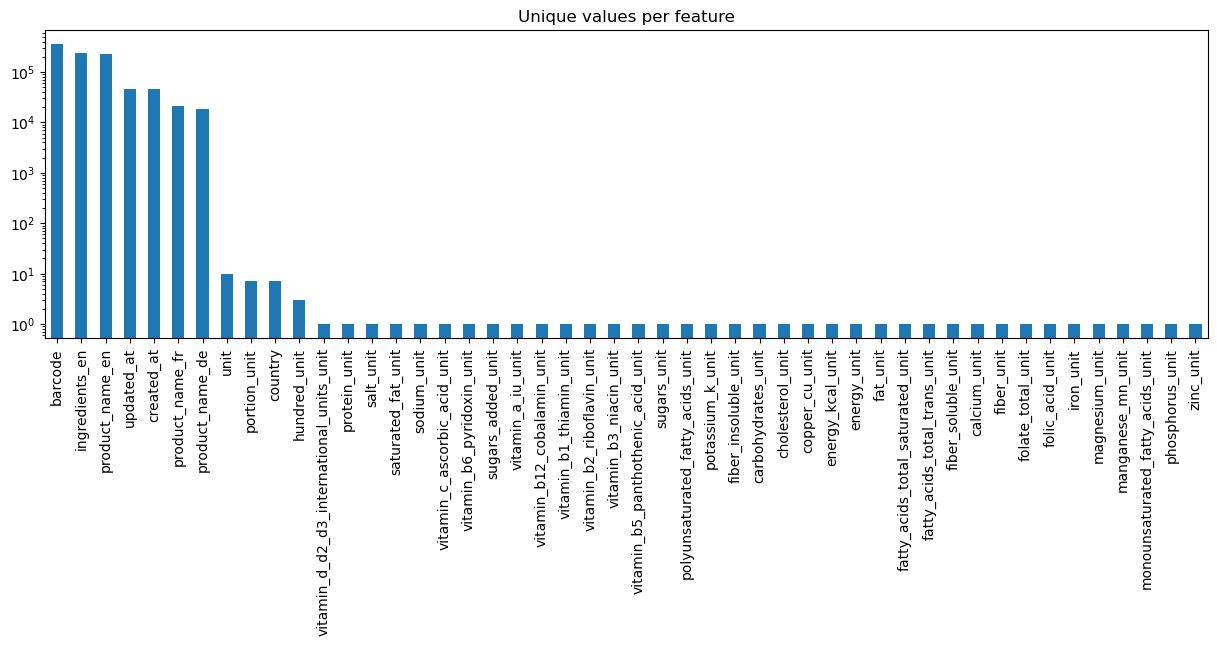

In [43]:
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature")

The previous plot indicates that the majority of the "unit" columns have only one unique value in them. However, the columns "hundred_unit" and "portion_unit" contain multiple values. This is not surprising, as columns such as "barcode," "ingredient," and "name" typically have many unique values since they are distinct for each product.

#### 5. Provide descriptive statistics (e.g., min/max/mean) and informative plots (e.g., histograms) of the numerical variables. You should obtain these plots as subplots.

In [44]:
df.describe()

,alcohol_by_volume,calcium_per_hundred,carbohydrates_per_hundred,cholesterol_per_hundred,energy_kcal_per_hundred,energy_per_hundred,fat_per_hundred,fatty_acids_total_saturated_per_hundred,fatty_acids_total_trans_per_hundred,fiber_per_hundred,...,protein_per_hundred,quantity,salt_per_hundred,saturated_fat_per_hundred,sodium_per_hundred,sugars_added_per_hundred,sugars_per_hundred,vitamin_a_iu_per_hundred,vitamin_c_ascorbic_acid_per_hundred,vitamin_d_d2_d3_international_units_per_hundred
count,358718.000000,252891.000000,333377.000000,258631.000000,335595.000000,335688.000000,330078.000000,266112.000000,257298.000000,271944.000000,...,334516.000000,358718.000000,21320.000000,20739.000000,309139.000000,41729.000000,315229.000000,184158.000000,190501.000000,62108.000000
mean,0.029168,117.393117,33.737248,58.920943,274.469581,1147.839872,12.845759,5.002445,0.034149,2.921117,...,7.288735,97.533277,0.975595,5.905210,1.364663,23.738491,17.021508,499.989172,15.673978,14.409142
std,0.786181,2608.262507,40.276547,1940.251666,258.250095,1079.523129,18.959453,8.602201,1.306658,5.889959,...,14.426875,413.199421,3.078524,8.267062,67.034153,25.176954,31.237601,2467.989932,594.117197,75.405511
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,6.670000,0.000000,92.000000,384.930000,0.000000,0.000000,0.000000,0.000000,...,0.420000,28.000000,0.050000,0.500000,0.030000,5.100000,1.710000,0.000000,0.000000,0.000000
50%,0.000000,36.000000,23.530000,0.000000,270.000000,1129.680000,5.600000,2.030000,0.000000,1.600000,...,4.510000,44.000000,0.250000,2.000000,0.250000,15.800000,6.670000,0.000000,0.000000,0.000000
75%,0.000000,104.000000,59.380000,25.000000,400.000000,1673.600000,20.000000,7.140000,0.000000,3.600000,...,10.000000,120.000000,1.200000,9.000000,0.570000,36.400000,25.000000,354.000000,4.000000,0.000000
max,57.900000,684000.000000,6400.000000,250000.000000,39600.000000,165686.400000,1900.000000,1000.000000,615.380000,1730.000000,...,5747.000000,230000.000000,99.800000,99.400000,25833.330000,1100.000000,5800.000000,333333.000000,210000.000000,5000.000000


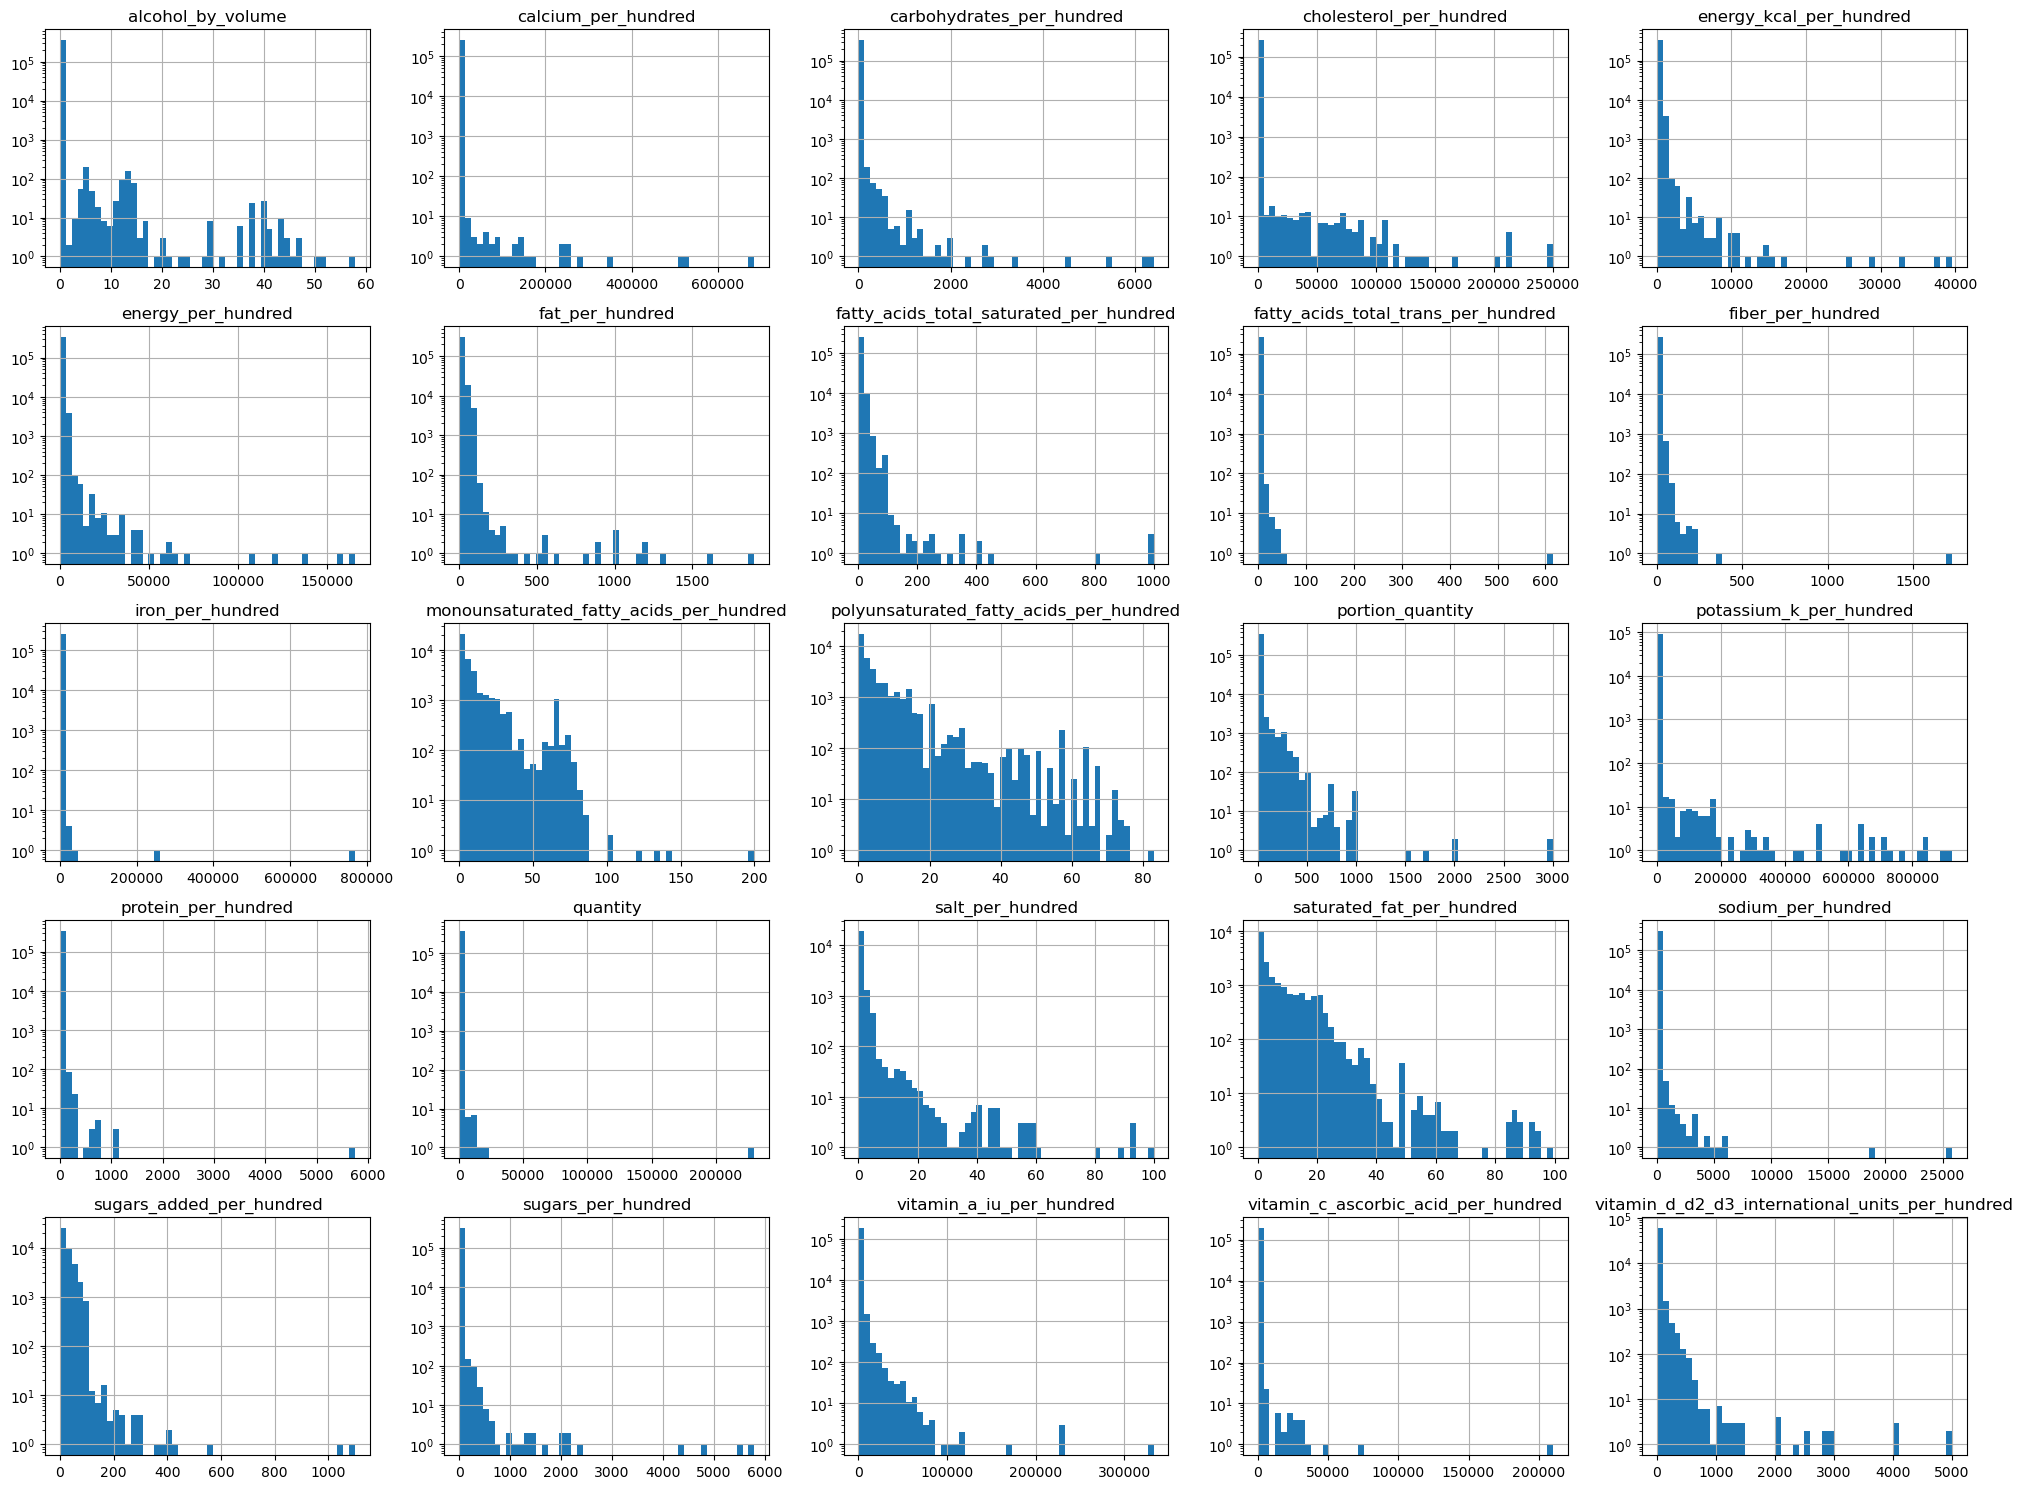

In [45]:
# Select numerical columns
num_cols = df.select_dtypes(include=['float64']).columns

# Plot histograms
df[num_cols].hist(bins=50, figsize=(20,15), layout=(-1, 5), log=True)
plt.tight_layout()
plt.show()

#### 6. Address any unrealistic values or errors. The statistics and your plots of the per_hundred columns (e.g. protein_per_hundred, fat_per_hundred, etc.) from task B5 can help you spot these values. Afterwards re-do the descriptive statistics and plots to check everything is ok now. 

In [46]:
# get an overview of all units used 
df[unit_cols].mode().transpose().head(10)

,0
calcium_unit,mg
carbohydrates_unit,g
cholesterol_unit,mg
copper_cu_unit,mg
energy_kcal_unit,kCal
energy_unit,kJ
fat_unit,g
fatty_acids_total_saturated_unit,g
fatty_acids_total_trans_unit,g
fiber_insoluble_unit,g


In [47]:
# same as previous but as a list with no duplicated values
unique_unit = pd.concat([pd.Series(df[col].unique()) for col in unit_cols], axis=0).drop_duplicates().tolist()
unique_unit

['mg', 'g', 'kCal', 'kJ', 'µg', 'ml', '?', 'l', 'kg', 'Floz', 'dl', 'IU']

In [48]:
#from tqdm.notebook import trange, tqdm

nbline = df.shape[0] # nb of rows
per_hundred_cols=[]
unit_cols=[]

for col in df.columns:
    if col.endswith("per_hundred"):
        per_hundred_cols.append(col)
    elif col.endswith("_unit"):
        unit_cols.append(col)

for per_hundred_col, unit_col in zip(per_hundred_cols, unit_cols):
    
    # loop through each line to get the corresponding unit
    for line in range(nbline) :
        unit = df[unit_col].iloc[line]
        
        # get the 'max value' depending of the unit
        if unit == 'g' or unit == 'dl':
            max_value = 10**2
        elif unit == 'kg' or unit == 'l' or unit == 'Floz':
            max_value = 10**3
        elif unit == 'mg' or unit == 'ml':
            max_value = 10**5 
        elif unit == 'µg':
            max_value = 10**8
        elif unit == 'kj' or unit == 'kCal':
            max_value = 3700        
        elif unit == 'IU' and '_d_' in unit_col:
            max_value = 3.3 * 10**8
        elif unit == 'IU' and '_a_' in unit_col:
            max_value = 10**9
        else:
            continue
            
    # check if the value in per_hundred column is less than the max value, if not replace by NaN
    df[per_hundred_col] = df[~df[per_hundred_col].isna()][per_hundred_col].apply(lambda x: np.nan if x > max_value else x)
df

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_unit,country,...,vitamin_b1_thiamin_unit,vitamin_b2_riboflavin_unit,vitamin_b3_niacin_unit,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_unit
0,0.0,8001772000030,NaN,mg,75.00,g,NaN,mg,mg,CH,...,mg,mg,mg,mg,mg,NaN,mg,NaN,IU,mg
1,0.0,7610809001066,NaN,mg,1.50,g,NaN,mg,mg,CH,...,mg,mg,mg,mg,mg,NaN,mg,NaN,IU,mg
2,0.0,8002530159021,NaN,mg,52.68,g,NaN,mg,mg,CH,...,mg,mg,mg,mg,mg,NaN,mg,NaN,IU,mg
3,0.0,3033715065788,NaN,mg,70.40,g,NaN,mg,mg,CH,...,mg,mg,mg,mg,mg,NaN,mg,NaN,IU,mg
4,0.0,7610848492740,NaN,mg,37.00,g,NaN,mg,mg,CH,...,mg,mg,mg,mg,mg,NaN,mg,NaN,IU,mg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374879,0.0,7640145040283,NaN,mg,NaN,g,NaN,mg,mg,CH,...,mg,mg,mg,mg,mg,NaN,mg,NaN,IU,mg
374880,0.0,7640147023628,850.0,mg,48.60,g,NaN,mg,mg,CH,...,mg,mg,mg,mg,mg,NaN,mg,NaN,IU,mg
374881,0.0,3046920021593,NaN,mg,22.00,g,NaN,mg,mg,CH,...,mg,mg,mg,mg,mg,NaN,mg,NaN,IU,mg
374882,0.0,4044889004335,NaN,mg,NaN,g,NaN,mg,mg,CH,...,mg,mg,mg,mg,mg,NaN,mg,NaN,IU,mg


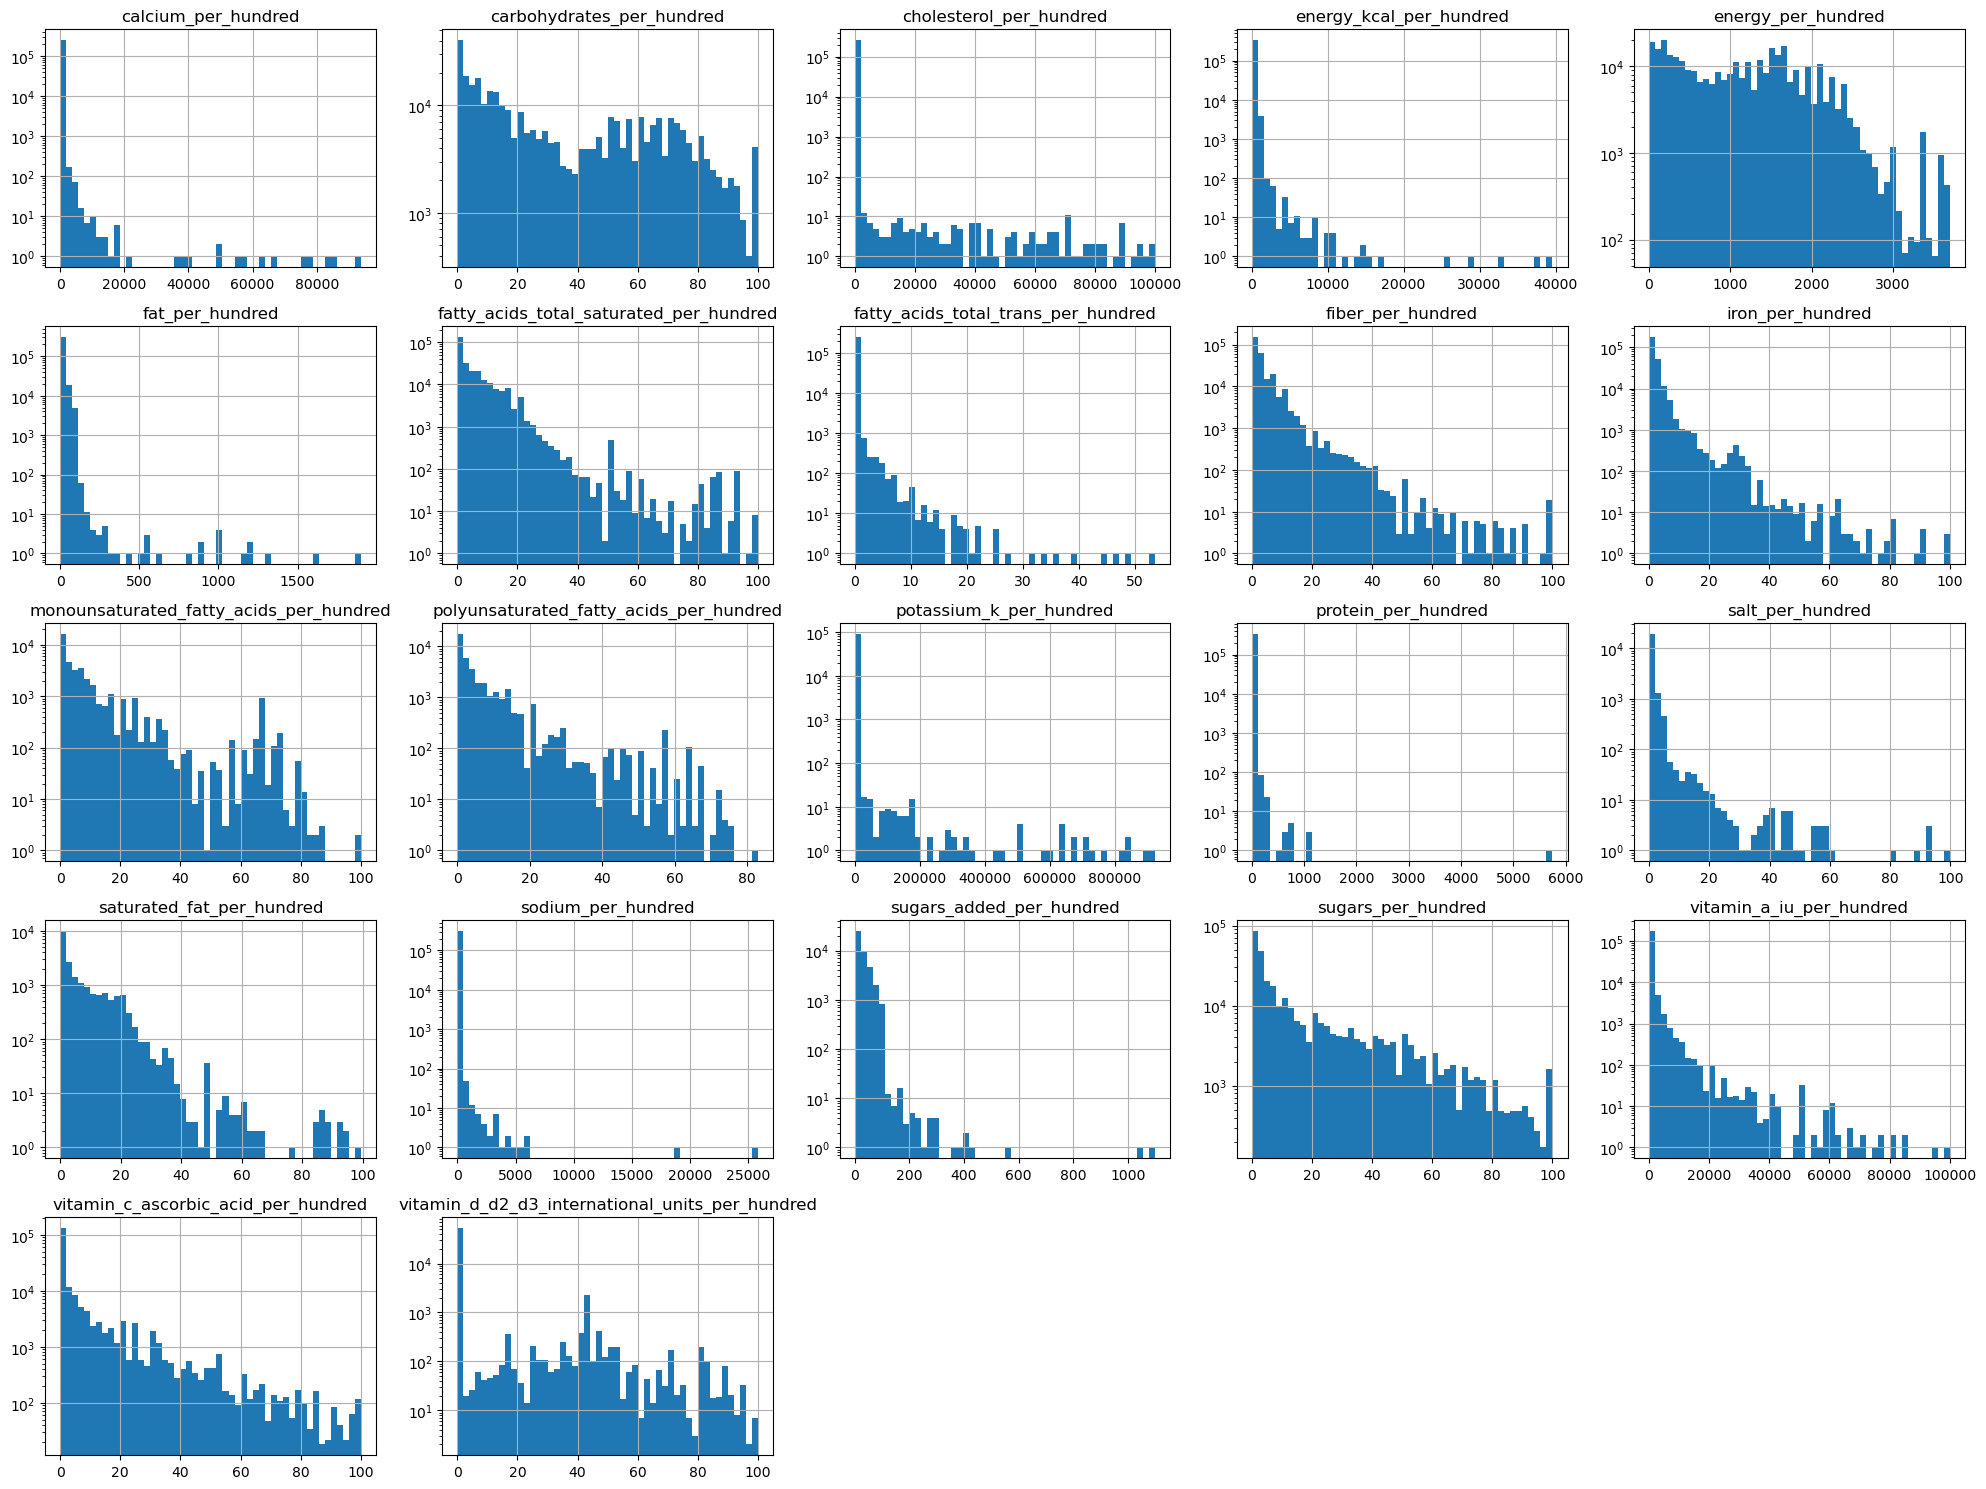

In [49]:
# Plot histograms
df[per_hundred_cols].hist(bins=50, figsize=(20,15), layout=(-1, 5), log=True)
plt.tight_layout()
plt.show()

In [50]:
df.shape

(358718, 74)

#### 7. Do you spot any other inconsistencies in the data? What about the sum of a product’s protein, fat, carbohydrates, salt, and fiber content?

In [51]:
# we can check if the sum of all '_per_hundred' rows is positive. if not we can delete rows where there is no datas in it.  

# sum the values of 'per_hundred' columns :
df['sum_per_hundred']=df[per_hundred_cols].sum(axis=1)
df.sort_values(by='sum_per_hundred', ascending=True).head()

# we can notice that values are egale to '0'

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_unit,country,...,vitamin_b2_riboflavin_unit,vitamin_b3_niacin_unit,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_unit,sum_per_hundred
374883,0.0,7613379866622,NaN,mg,NaN,g,NaN,mg,mg,CH,...,mg,mg,mg,mg,NaN,mg,NaN,IU,mg,0.0
42048,0.0,7610807023251,NaN,mg,NaN,g,NaN,mg,mg,CH,...,mg,mg,mg,mg,NaN,mg,NaN,IU,mg,0.0
26375,0.0,20242091,NaN,mg,NaN,g,NaN,mg,mg,CH,...,mg,mg,mg,mg,NaN,mg,NaN,IU,mg,0.0
26376,0.0,7614200116701,NaN,mg,NaN,g,NaN,mg,mg,CH,...,mg,mg,mg,mg,NaN,mg,NaN,IU,mg,0.0
26377,0.0,7699999541637,NaN,mg,NaN,g,NaN,mg,mg,CH,...,mg,mg,mg,mg,NaN,mg,NaN,IU,mg,0.0


In [52]:
# mask which has 'True' for every sample that needs to be dropped
entries_to_drop = df['sum_per_hundred'] == 0
print("Number of entries to drop :", entries_to_drop.sum())

# Dropping these entries by only selecting the samples that shouldn't be dropped
df = df[~entries_to_drop]

Number of entries to drop : 28686


In [53]:
df.shape

(330032, 75)

In [54]:
# sum the values of specified columns and show them :
g_per_hundred_lst=['protein_per_hundred','fat_per_hundred','carbohydrates_per_hundred','salt_per_hundred','fiber_per_hundred']
df = df.copy()
df['sum_per_hundred_g']=df[g_per_hundred_lst].sum(axis=1)
g_per_hundred_lst.append('sum_per_hundred_g')
df[g_per_hundred_lst].sort_values(by='sum_per_hundred_g', ascending=False).head()

# we can notice than values are over 100 which is not possible 

,protein_per_hundred,fat_per_hundred,carbohydrates_per_hundred,salt_per_hundred,fiber_per_hundred,sum_per_hundred_g
374103,5747.0,7.72,23.9,2.62,NaN,5781.24
360517,300.0,1900.00,NaN,NaN,100.0,2300.00
354735,800.0,1200.00,NaN,NaN,80.0,2080.00
340777,760.0,1170.00,NaN,NaN,40.0,1970.00
340607,300.0,1300.00,NaN,NaN,100.0,1700.00


In [55]:
# mask which has 'True' for every sample that needs to be dropped
entries_to_drop = df['sum_per_hundred_g'].gt(100)
print("Number of entries to drop :", entries_to_drop.sum())

# Dropping these entries by only selecting the samples that shouldn't be dropped
df = df[~entries_to_drop]

Number of entries to drop : 27168


In [56]:
# check the max value
df['sum_per_hundred_g'].max()

100.0

In [57]:
df.shape

(302864, 76)

#### 8. Despite removing recording errors from the per_hundred columns, some of them still contain “extreme” values, which are distinct from the rest of the data points. Your goal is to pick a few variables from the per_hundred list and address outliers.

##### Manuel outlier removal :

In [58]:
# first identify and then remove these samples
filter= df["calcium_per_hundred"].gt(20000)
print("Number of entries to drop :", filter.sum())

# Dropping these entries by only selecting the samples that shouldn't be dropped
df = df[~filter]

Number of entries to drop : 14


In [59]:
# first identify and then remove these samples
filter= df["energy_kcal_per_hundred"].gt(3000)
print("Number of entries to drop :", filter.sum())

# Dropping these entries by only selecting the samples that shouldn't be dropped
df = df[~filter]

Number of entries to drop : 16


In [60]:
# first identify and then remove these samples
filter= df["sodium_per_hundred"].gt(2000)
print("Number of entries to drop :", filter.sum())

# Dropping these entries by only selecting the samples that shouldn't be dropped
df = df[~filter]

Number of entries to drop : 20


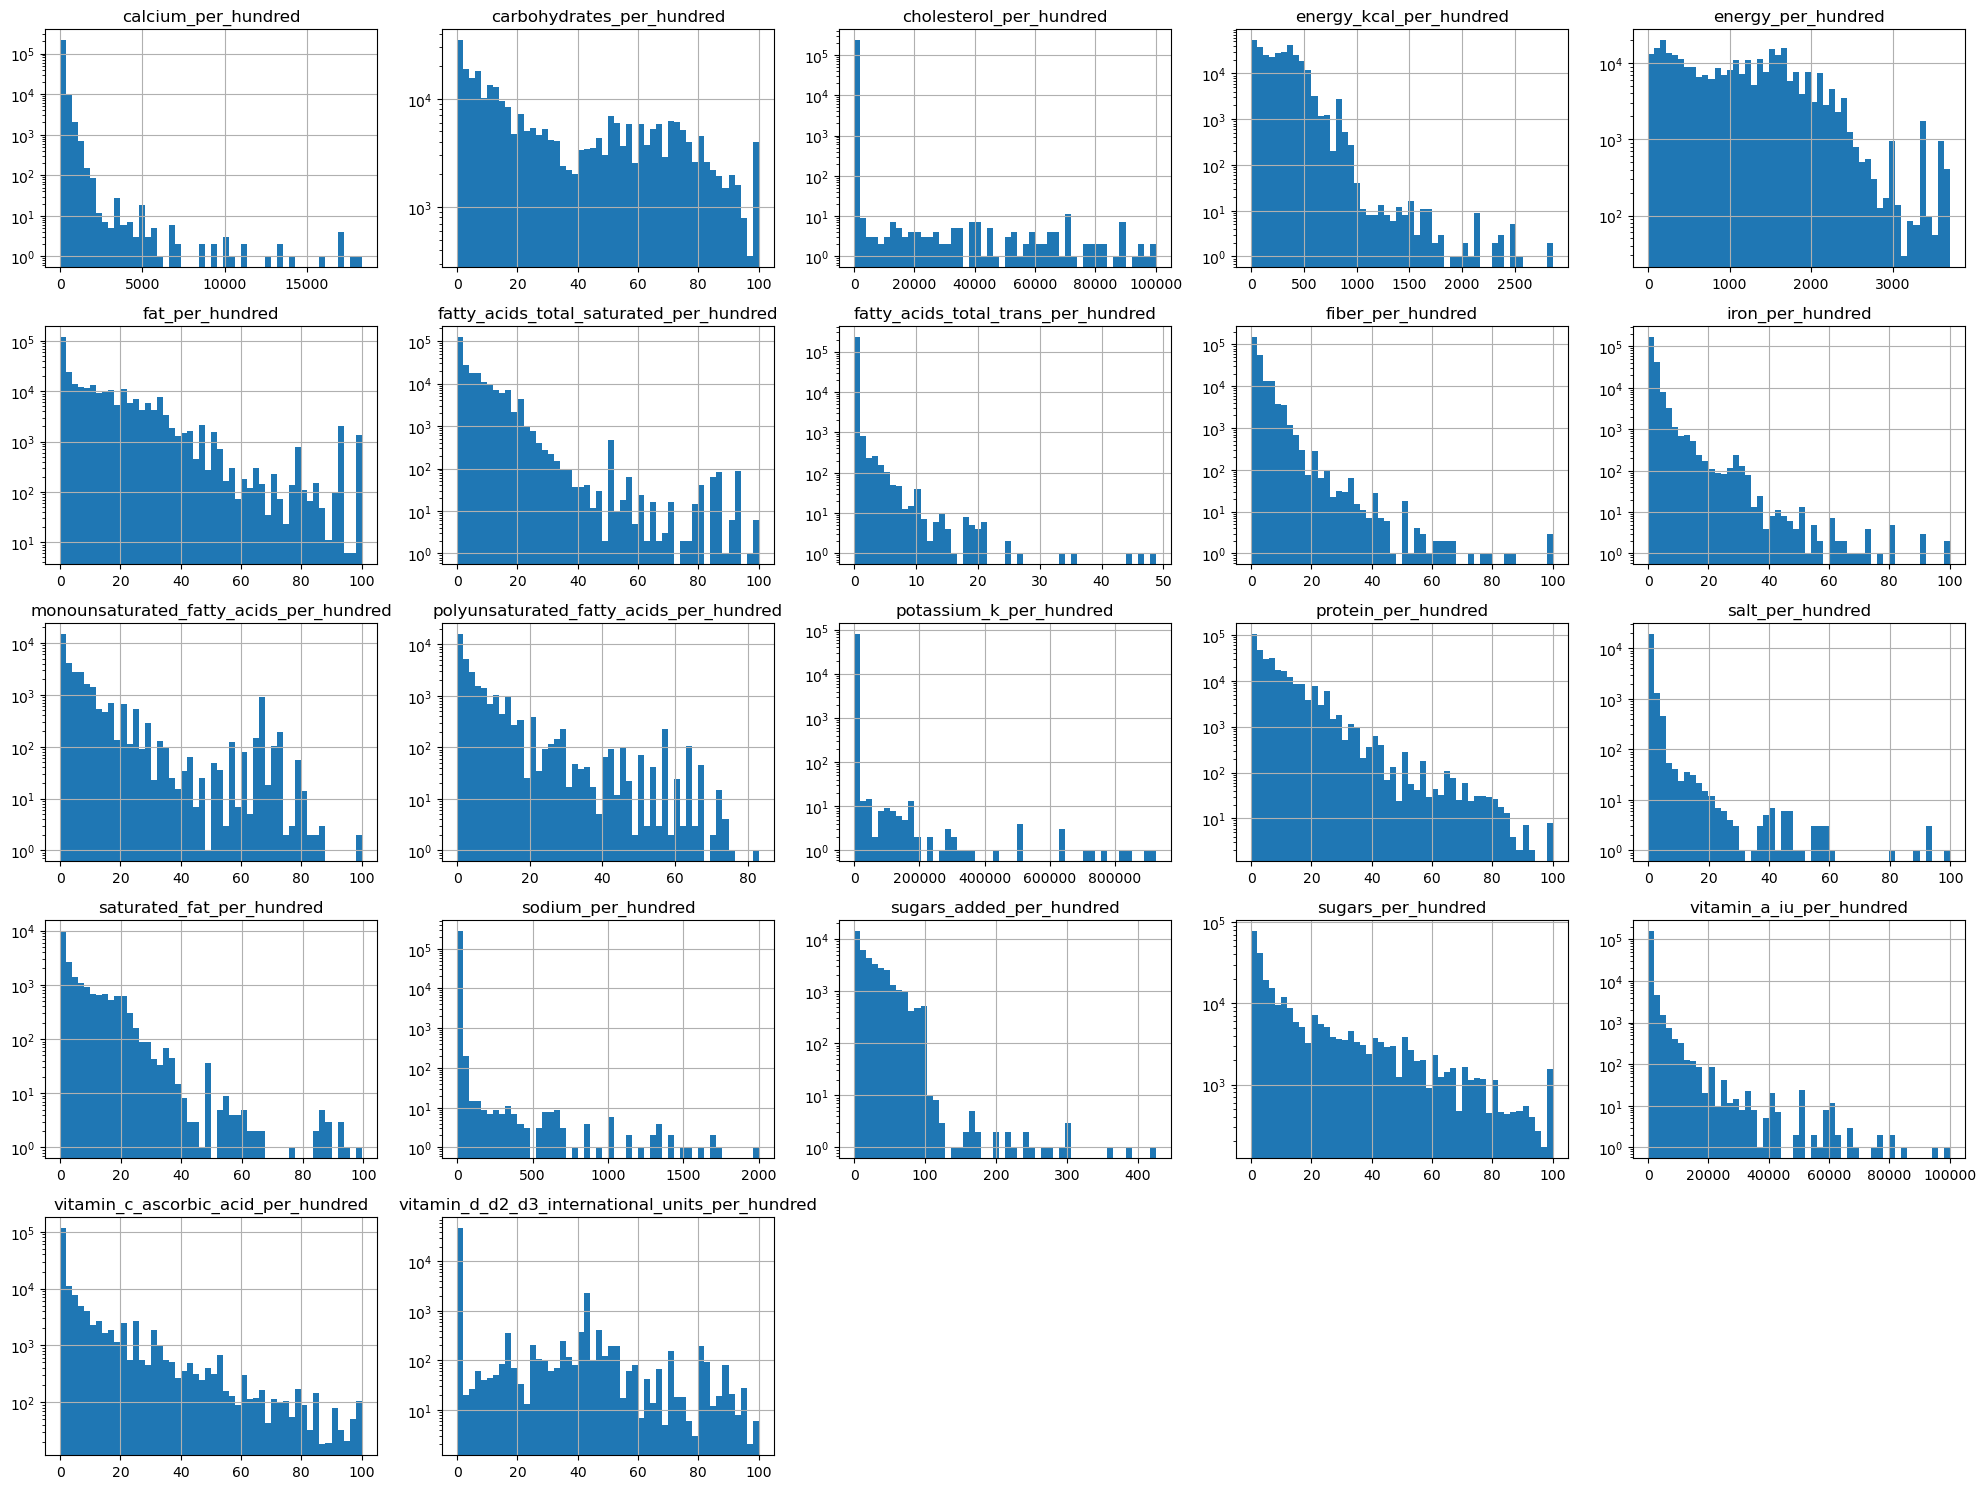

In [61]:
# Plot histograms
df[per_hundred_cols].hist(bins=50, figsize=(20,15), layout=(-1, 5), log=True)
plt.tight_layout()
plt.show()

# C. In-depth Exploratory Data Analysis

* What is the total number of samples by country? Countries with very small sample size should be dropped from this analysis as their results may not be statistically significant.

In [62]:
# Samples by country
df['country'].value_counts()

US    279088
CH     22422
DE       979
IT       270
FR        53
AT         1
UK         1
Name: country, dtype: int64

In [63]:
# Drop rows where the number of samples by 'Country'  is AT and UK
df = df.drop(df[df['country'].isin(['UK','AT'])].index)

In [64]:
df['country'].value_counts()

US    279088
CH     22422
DE       979
IT       270
FR        53
Name: country, dtype: int64

In [65]:
df.shape

(302812, 76)

* Count the number of organic and non-organic products in each country. Is there a country with a higher percentage of organic products?

In [66]:
# number of 'organics' or 'bio' products
organic = df['product_name_en'].str.lower().str.contains('bio|organic').sum()

# non organic products are all the other products
non_organic =df.shape[0] - df['product_name_en'].str.contains('bio|organic').sum()

print('Organic products : ', organic)
print('Non organic products : ', non_organic)

Organic products :  15633
Non organic products :  302489


In [67]:
countries = ['US','CH','DE','IT','FR']

# Create an empty dataframe to store the results
result = pd.DataFrame(columns=['country', 'organic', 'non_organic', 'organic_perc'])

# Loop through the countries list 
for country in countries:
    df1 = df[df['country'] == str(country)]
    organic = df1['product_name_en'].str.lower().str.contains('bio|organic').sum()
    non_organic = df1.shape[0]-organic
    organic_perc = (organic*100 / df1.shape[0]).round(1)
    
    # Append the results to the result dataframe
    result = result.append({'country': country, 'organic': organic, 'non_organic': non_organic, 'organic_perc':organic_perc}, ignore_index=True)

result.sort_values(by='organic_perc', ascending=False).set_index('country')

,organic,non_organic,organic_perc
country,,,
DE,94,885,9.6
CH,1247,21175,5.6
US,14285,264803,5.1
FR,2,51,3.8
IT,5,265,1.9


Germany has the highest percentage of organic products with 9.6%.

*  Compare the distributions of the macronutrients between organic and non-organic products in each country. Your solution method should include appropriate visualisations in the subplots format.

In [68]:
df['organic'] = df['product_name_en'].apply(lambda x: 'y' if isinstance(x, str) and ('organic' in x.lower() or 'bio' in x.lower()) else 'n')

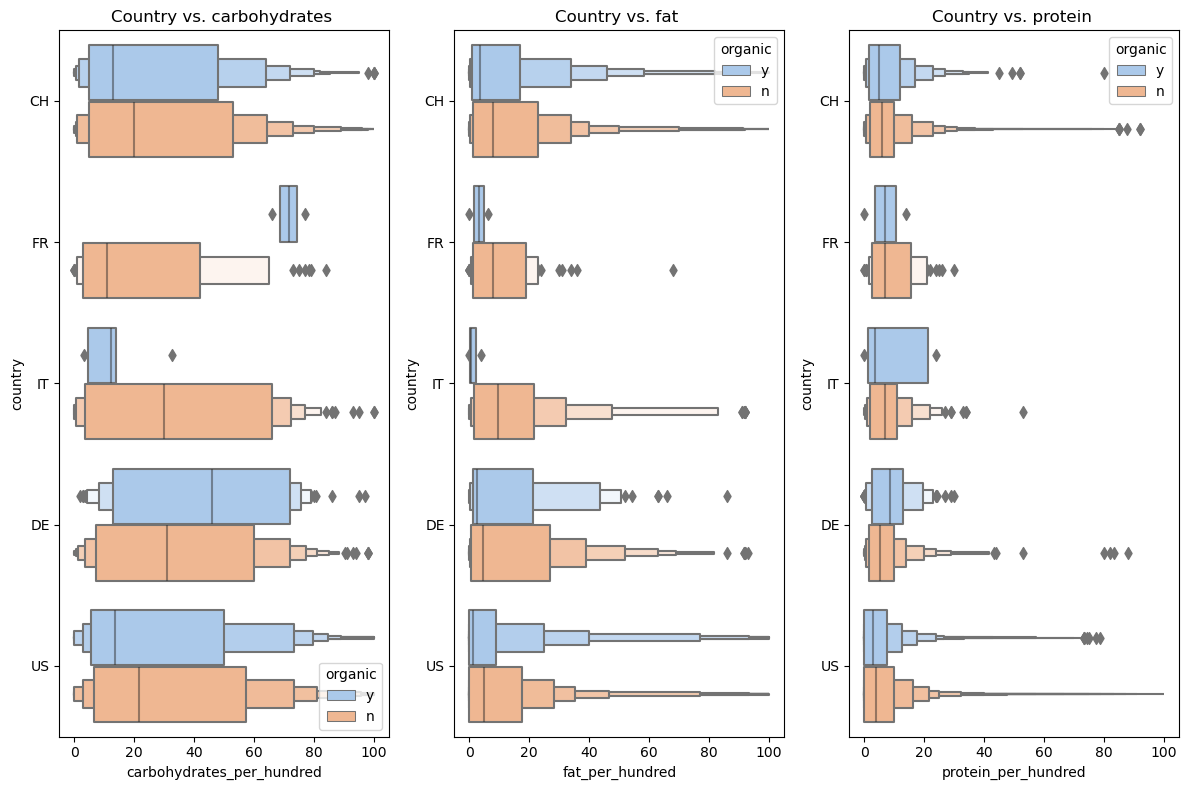

In [69]:
# Define the columns to plot
macronutrients = ['carbohydrates_per_hundred','fat_per_hundred','protein_per_hundred']

# Create the figure and axes objects for the subplots
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(12, 8), sharey=False)

# Flatten the axes array to access each subplot individually
axes = axes.flatten()

# Loop through the columns and plot each one in a separate subplot
for i, macronutrient in enumerate(macronutrients):
    sns.boxenplot(data=df, 
                  x=macronutrient, 
                  y="country", 
                  ax=axes[i], 
                  hue='organic', 
                  palette="pastel")
    macronut = macronutrient.replace("per_hundred", "").replace("_", " ")
    axes[i].set_title('Country vs. '+macronut)

fig.tight_layout()
plt.show()

# D. Text data

#### 1. Find the product with the longest ingredients list, i.e. the largest number of ingredients. Print the product name and its ingredient list.

In [70]:
# Define preprocess_text function

def preprocess_text(txt):
    
    '''
    This function preprocesses raw samples of text:
    - Converts to lowercase
    - Replaces common punctuation marks, symbols, whitespace with blank
    - Remove nuericals values only if they are between paranthesis 
    - Remove words before symbols (, {, [ and : and after a comma
    
    INPUT: 
    - text: "raw" text (string)
    
    OUTPUT:
    - text processed
    '''
    
    # Replaces common punctuation marks, symbols, whitespace with blank
    txt = re.sub(r"\s-\s"," ", txt)
    txt = txt.replace('\r','')
    txt = txt.replace('\n','')
    txt = txt.replace('*','')
    txt = txt.lower()
    txt = txt.replace(' ','_')

    # Remove nuericals values only if they are between paranthesis 
    pattern = r'\(\d{1,2}\.\d{1,2}%\)|\(\d{1,2}%\)'
    matches = re.findall(pattern, txt)
    for match in matches:
        txt = txt.replace(match, '')

    # Remove words before symbols (, {, [ and : and after a comma
    
    tok_to_delete = []

    for item in txt.split(','):
        start_index = item.find('(')
        if start_index != -1:
            tok_to_delete.append(item[:start_index])
    for item in txt.split(','):
        start_index = item.find('[')
        if start_index != -1:
            tok_to_delete.append(item[:start_index])
    for item in txt.split(','):
        start_index = item.find('{')
        if start_index != -1:
            tok_to_delete.append(item[:start_index])
    for item in txt.split(','):
        start_index = item.find(':')
        if start_index != -1:
            tok_to_delete.append(item[:start_index])

    pattern = r'\d{1,2}\.\d{1,2}%|\d{1,2}%'
    matches = re.findall(pattern, txt)
    for match in matches:
        tok_to_delete.append(match)
        
    for tok in tok_to_delete:
        txt = txt.replace(tok, '')

    txt = re.sub(r"[():]",",", txt)
    txt = txt.replace(',,', ',')
    txt = txt.replace(',,,', ',')
    txt = txt.replace(',_',',')
    txt = txt.replace('_',' ')

    return txt

In [71]:
preprocessed_ingredients_en_clean = [preprocess_text(doc) for doc in df['ingredients_en']]

# Add processed ingredient cleaned with collocations to dataframe
df['ingredients_en_clean'] = preprocessed_ingredients_en_clean

# add new column to DataFrame, split each token of the ingredient and count how many uniaue words are in the list
df['tok_count'] = df['ingredients_en_clean'].apply(lambda x: len(set(x.split(','))))

# Creat a new dataframe and sort by column 'tok_count'
df_product = df[['product_name_en', 'ingredients_en', 'ingredients_en_clean','tok_count']].sort_values(by='tok_count', ascending=False)
df_product.head()

,product_name_en,ingredients_en,ingredients_en_clean,tok_count
373044,TRIPLE CHEESE STIX A RICH AND CREAMY THREE-CHE...,"INGREDIENTS: WATER, ENRICHED FLOUR ( WHEAT FLO...",",water,wheatflour,maltedbarleyflour,maltedbarl...",115
349187,HOLIDAY COOKIE TRAY,"BLEACHED WHEAT FLOUR, SUGAR, SHORTENING (SOYBE...","bleached wheat flour,sugar,soybean oil,hydroge...",113
253284,MINI DECADENT DESSERTS,"WATER, SUGAR, PALM OIL, HIGH FRUCTOSE CORN SYR...","water,sugar,palm oil,high fructose corn syrup,...",112
299065,HAM CROQUETTES,COOKED HAM AND WATER PRODUCT - 25% OF WEIGHT I...,",curedwithwater,salt,sugar,sodiumphosphates,na...",107
208610,PEPPER STEAK,"PEPPER STEAK SAUCE (WATER, PINEAPPLE JUICE [PI...",",water,pineapplejuice[pineapplejuice,vitaminc,...",105


In [72]:
#Get the name of the longuest engredient list
name = df_product.iat[0,0]

# Get the list of all the engredients
ingredient = df_product.iat[0,1]
# Get the number of uniaue engredients
tok = df_product.iat[0,3]

print(f" With a number of {tok} ingredients, the name of the product with the longuest ingredient list is : {name} \n \n Ingredient list : \n {ingredient}")

 With a number of 115 ingredients, the name of the product with the longuest ingredient list is : TRIPLE CHEESE STIX A RICH AND CREAMY THREE-CHEESE BLEND STUFFED IN A CRISPY CRUST STICK, TRIPLE CHEESE STIX 
 
 Ingredient list : 
 INGREDIENTS: WATER, ENRICHED FLOUR ( WHEAT FLOUR, MALTED BARLEY FLOUR, MALTED BARLEY FLOUR, NIACIN, IRON, THIAMINE MONONITRATE, RIBOFLAVIN, FOLIC ACID) , IMITATION CHEDDAR CHEESE ( WATER, MODIFIED FOOD STARCH, CASEIN,SOYBEAN OIL, WHEY, CONTAINS 2% OR LESS OF SALT, SODIUM ALUMINUM PHOSPHATE, SODIUM PHOSPHATE, LACTIC ACID, SODIUM CITRATE, NATURAL FLAVOR, ANNATTO [COLOR]), REDUCED FAT CHEDDAR CHEESE ( PASTEURIZED PART SKIM MILK, SKIM MILK, MODIFIED FOOD STARCH*, CULTURES, SALT, FLAVORS*, POTASSIUM CHLORIDE, ANNATTO VITAMIN PALMITATE, ENZYMES, *INGREDIENTS NOT IN REGULAR CHEDDAR CHEESE), PASTEURIZED PROCESS CHEDDAR CHEESE, (CHEDDAR CHEESE [PASTEURIZED MILK. CHEESE CULTURE, SALT, ENZYMES], WATER, MILK FAT, SODIUM HEXAMETAPHOSPHATE, ENZYME MODIFIED CHEESE [ENZYME MO

#### 2. Find the products with the shortest ingredients list, i.e. the fewest ingredients. Display some examples and comment on your observation.

In [73]:
df['word_count'] = df['ingredients_en'].str.split().str.len()

# Replace the value 'ingredients_en_missing' with 0 in the 'token_count' column
df['word_count'] = df['word_count'].where(df['ingredients_en'] != 'ingredients_en_missing', 0)

df_product=df[['product_name_en', 'ingredients_en', 'word_count']]
df_product[df_product['word_count']>0].sort_values(by='word_count', ascending=True).head()

,product_name_en,ingredients_en,word_count
9877,M Classic Peanuts,Peanuts,1
350298,100% ITALIAN ARTICHOKES QUARTERS FROZEN PREMIU...,ARTICHOKES.,1
174628,JUST PICKLED WHOLE STRAWBERRY,STRAWBERRIES.,1
313933,STEAMIN' EASY FRESHLY FROZEN CAULIFLOWER FLORETS,CAULIFLOWER.,1
93076,"KOEGEL'S, PAPRIKA",PAPRIKA,1


Products with the shortest ingredient list consist of a single ingredient, as demonstrated by the first entries in the above-mentioned dataframe. These products are typically raw, such as vegetables or meat.

#### 3. Which are the most frequent ingredients in products? You will also choose an appropriate method to visualize your findings.

In [74]:
df_product = df[['product_name_en', 'ingredients_en', 'ingredients_en_clean']]

In [75]:
# Combine the ingredients into a single string for each row
df_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302812 entries, 0 to 374881
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   product_name_en       302812 non-null  object
 1   ingredients_en        302812 non-null  object
 2   ingredients_en_clean  302812 non-null  object
dtypes: object(3)
memory usage: 17.3+ MB


In [76]:
# Create a new column 'ingredients_list' based on 'ingredients_str' column
df['ingredients_list'] = df['ingredients_en_clean'].str.split(',')

# Print the first few rows of the new column
print(df['ingredients_list'].head())

0    [, durum wheat, waterall agricultural ingredie...
1                        [, switzerland, kitchen salt]
2                                  [1  coffee arabica]
3    [, sugar, cocoa, , soy lecithin, , vanillin, c...
4    [, honduras, , paraguay, , dominican republic,...
Name: ingredients_list, dtype: object


In [77]:
# filter out empty values, '.', and ' ', and count the frequency of each item
items_column = df['ingredients_list'].explode().dropna().loc[lambda x: (x.str.strip() != '') & (x.str.strip() != '.') & (x.str.strip() != ' ')]
item_counts = items_column.value_counts()

# Print the most common item
item_counts.head(20)

salt                    244812
water                   165965
sugar                   162527
citric acid              63253
niacin                   43552
corn syrup               42328
riboflavin               40378
natural flavor           38167
wheat flour              37466
folic acid               35198
dextrose                 35107
spices                   34295
soy lecithin             33876
enzymes                  32552
soybean oil              32145
reduced iron             30380
sea salt                 28137
xanthan gum              27988
thiamine mononitrate     24949
natural flavors          24789
Name: ingredients_list, dtype: int64

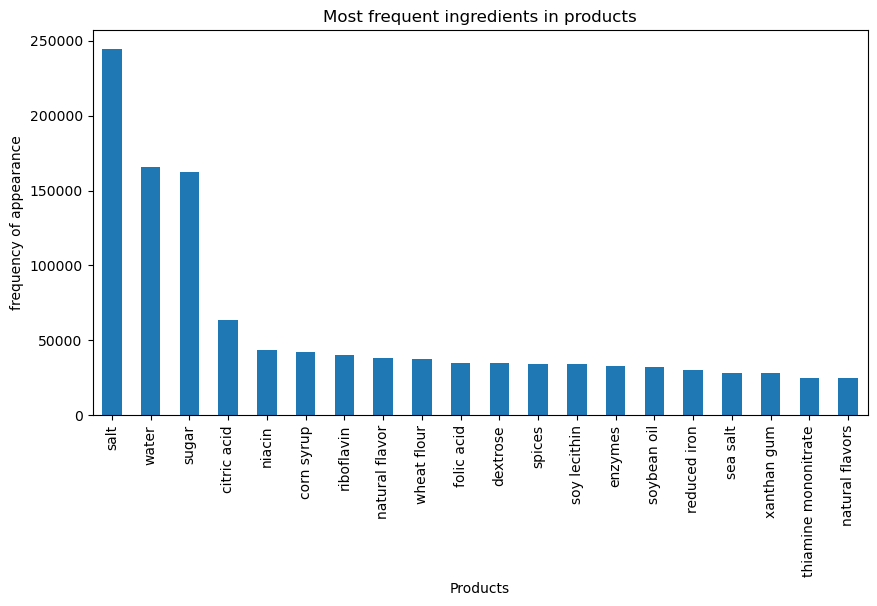

In [78]:
# Plot the most frequent products
item_counts.head(20).plot(kind='bar',
                          figsize=(10, 5), 
                          title="Most frequent ingredients in products", 
                          xlabel='Products', 
                          ylabel='frequency of appearance')
plt.show()

In [79]:
top_ingr = item_counts.index[0]
print( f'The plot above displays the most commonly occurring ingredient in the dataframe, which happens to be "{top_ingr}"')

The plot above displays the most commonly occurring ingredient in the dataframe, which happens to be "salt"


# E. Time-series data

#### 1.Your task is to investigate the total number of items created each month at each hour. You should use the created_at column to draw a heatmap with the hours (0 to 23) on the x-axis and the months (1 to 12) on the y-axis. The color of the heatmap should show the number of items created at each month-hour pair.

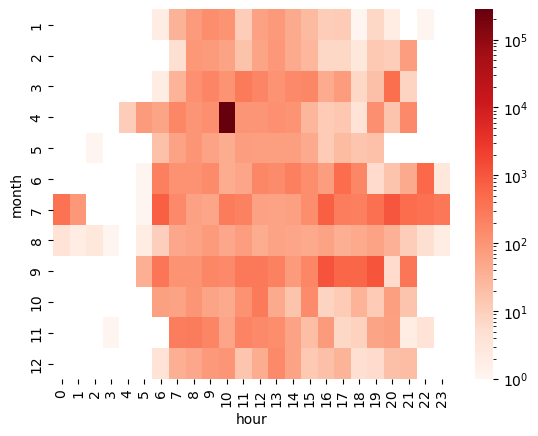

In [80]:
from matplotlib.colors import LogNorm

# Convert the created_at column to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

# Extract the month and hour information from the created_at column
df['month'] = df['created_at'].dt.month
df['hour'] = df['created_at'].dt.hour

# Create a pivot table to count the number of items created each month at each hour
table = df.pivot_table(index='month', columns='hour', aggfunc='size', fill_value=0)

# Draw the heatmap
sns.heatmap(table, cmap='Reds', norm=LogNorm())

plt.show()

#### 2.Your task is to investigate the evolution of the total number of items over time. 

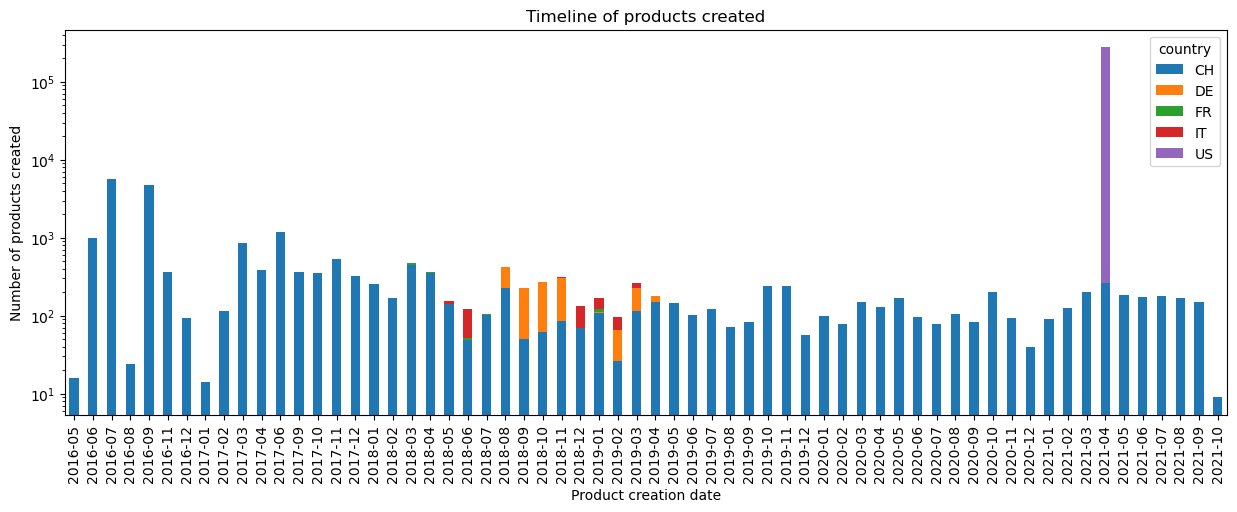

In [81]:
# Convert the created_at column to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

# Extract the month information from the created_at column
df['month'] = df['created_at'].dt.strftime('%Y-%m')

# Group the data by month and country and count the number of items created each month by each country
grouped = df.groupby(['month', 'country']).size().reset_index(name='count')

# Pivot the data to create a table with the months as the index, the countries as the columns, and the counts as the values
pivot_table = grouped.pivot(index='month', columns='country', values='count')

# Draw the bar plot
pivot_table.plot(kind='bar', 
                 stacked=True, 
                 figsize=(15, 5), 
                 logy=True, 
                 title="Timeline of products created", 
                 xlabel='Product creation date', 
                 ylabel='Number of products created')

plt.show()

# F. Correlation analysis

#### 1.Your task is to quantify the linear relationships between the energy_per_hundred and other numerical variables.

In [82]:
# Creat a dataframe with 'per_hundred_cols'
df_corr=df[per_hundred_cols]

In [83]:
df_corr = df_corr.corr(method="pearson") #Compute correlation of all columns
df_corr

,calcium_per_hundred,carbohydrates_per_hundred,cholesterol_per_hundred,energy_kcal_per_hundred,energy_per_hundred,fat_per_hundred,fatty_acids_total_saturated_per_hundred,fatty_acids_total_trans_per_hundred,fiber_per_hundred,iron_per_hundred,...,potassium_k_per_hundred,protein_per_hundred,salt_per_hundred,saturated_fat_per_hundred,sodium_per_hundred,sugars_added_per_hundred,sugars_per_hundred,vitamin_a_iu_per_hundred,vitamin_c_ascorbic_acid_per_hundred,vitamin_d_d2_d3_international_units_per_hundred
calcium_per_hundred,1.000000,-0.107002,0.010731,0.115387,0.114669,0.161375,0.308654,-0.008493,-0.015443,0.061522,...,0.016204,0.329231,0.124638,0.542265,0.012259,-0.014266,-0.074861,0.102951,-0.038736,0.095078
carbohydrates_per_hundred,-0.107002,1.000000,-0.016388,0.518731,0.531747,-0.109830,-0.074127,0.005907,0.265650,0.281531,...,-0.001891,-0.140404,-0.080832,0.061520,-0.022199,0.769768,0.706029,-0.058797,-0.101996,-0.231859
cholesterol_per_hundred,0.010731,-0.016388,1.000000,0.009747,0.009509,0.017716,0.025446,0.003579,-0.012858,-0.005732,...,0.000220,0.024023,-0.206181,0.035881,0.183614,-0.007525,-0.007006,0.000372,-0.011167,-0.003000
energy_kcal_per_hundred,0.115387,0.518731,0.009747,1.000000,0.997087,0.754753,0.578370,0.058700,0.238762,0.248530,...,0.010863,0.258528,-0.041113,0.637127,-0.018499,0.497462,0.377412,-0.051856,-0.240212,-0.271075
energy_per_hundred,0.114669,0.531747,0.009509,0.997087,1.000000,0.756522,0.578564,0.055871,0.240448,0.251767,...,0.010631,0.265124,-0.041146,0.645779,-0.018771,0.477160,0.382868,-0.052952,-0.241138,-0.272107
fat_per_hundred,0.161375,-0.109830,0.017716,0.754753,0.756522,1.000000,0.711182,0.066949,0.066004,0.041579,...,0.024192,0.213930,-0.024673,0.741260,-0.004215,-0.012468,-0.051915,-0.024236,-0.193356,-0.167405
fatty_acids_total_saturated_per_hundred,0.308654,-0.074127,0.025446,0.578370,0.578564,0.711182,1.000000,0.039892,-0.067982,-0.035991,...,0.023041,0.188108,NaN,NaN,0.005210,0.231587,0.092806,0.011179,-0.176944,-0.121959
fatty_acids_total_trans_per_hundred,-0.008493,0.005907,0.003579,0.058700,0.055871,0.066949,0.039892,1.000000,-0.016451,-0.007896,...,0.002651,-0.009840,NaN,NaN,-0.001125,-0.005459,0.012704,0.007161,-0.014117,-0.006968
fiber_per_hundred,-0.015443,0.265650,-0.012858,0.238762,0.240448,0.066004,-0.067982,-0.016451,1.000000,0.352861,...,0.022134,0.113087,-0.010507,0.006432,0.003011,-0.127719,0.004507,0.104982,0.065804,-0.130883
iron_per_hundred,0.061522,0.281531,-0.005732,0.248530,0.251767,0.041579,-0.035991,-0.007896,0.352861,1.000000,...,0.008867,0.172946,-0.043603,0.069134,0.011154,0.009482,0.036047,0.158317,0.087470,-0.082481


In [84]:
#Compute correlation of all columns
df_corr = df_corr.corr(method="pearson") 

#filter on 'energy_per_hundred' and sort values
df_corr['energy_per_hundred'].sort_values(ascending=False).round(3)

energy_per_hundred                                 1.000
energy_kcal_per_hundred                            1.000
fat_per_hundred                                    0.827
fatty_acids_total_saturated_per_hundred            0.740
monounsaturated_fatty_acids_per_hundred            0.736
polyunsaturated_fatty_acids_per_hundred            0.675
saturated_fat_per_hundred                          0.582
sugars_per_hundred                                 0.395
sugars_added_per_hundred                           0.367
carbohydrates_per_hundred                          0.358
fiber_per_hundred                                  0.156
iron_per_hundred                                   0.114
protein_per_hundred                                0.110
calcium_per_hundred                                0.031
fatty_acids_total_trans_per_hundred               -0.068
cholesterol_per_hundred                           -0.146
potassium_k_per_hundred                           -0.179
sodium_per_hundred             

#### 2.Your task is to reveal the true nature of the relationship, linear or non-linear, between variables, using visualizations. Based on the correlation coefficients you found in the previous task, pick the three most correlated and the three least correlated variables (in absolute terms) with the energy_per_hundred column.

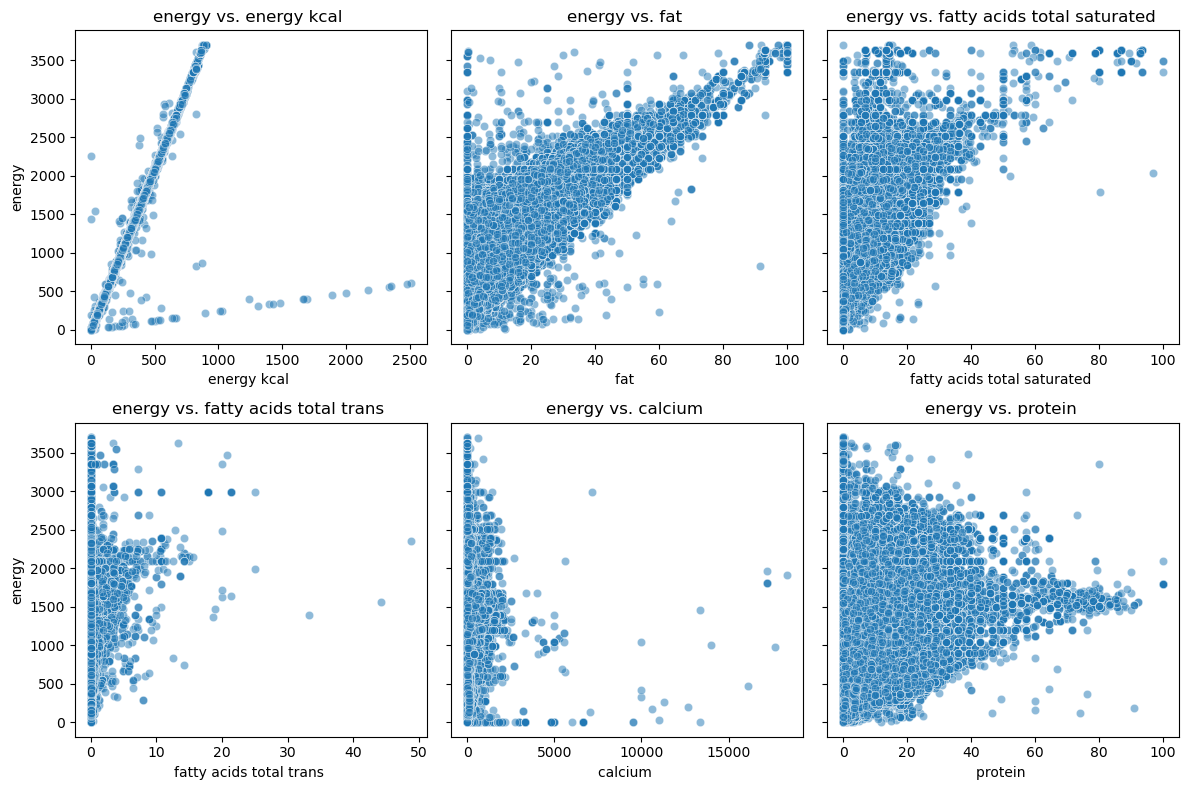

In [85]:
# Define the columns to plot
columns = ['energy_kcal_per_hundred','fat_per_hundred','fatty_acids_total_saturated_per_hundred','fatty_acids_total_trans_per_hundred','calcium_per_hundred','protein_per_hundred']

# Create the figure and axes objects for the subplots
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(12, 8), sharey=True)

# Flatten the axes array to access each subplot individually
axes = axes.flatten()

# Loop through the columns and plot each one in a separate subplot
for i, col in enumerate(columns):
    sns.scatterplot(data=df, 
                    x=col, 
                    y="energy_per_hundred", 
                    ax=axes[i], 
                    alpha=0.5)
    axes[i].set_ylabel('energy')
    col = col.replace("per_hundred", "").replace("_", " ")
    axes[i].set_xlabel(col)
    axes[i].set_title('energy vs. '+col)

fig.tight_layout()
plt.show()

The three plots at the top of the figure show the most significant correlations. 
- The correlation between energy and energy Kcal is almost perfect, but a second line is detectable in the correlation. 
- The correlation between fat and total saturated fatty acids shows that, although they are highly correlated, it is possible for a fat-free product to have a high energy score, which is not correlated at all. 
- The linear relationship between the two most correlated plots is clearly visible.

On the other hand, the three plots at the bottom of the figure are the least correlated, and no relationship between the values is evident.

#### 3.Your task is to test the independence of two categorical variables statistically.

In [86]:
from scipy.stats import chi2_contingency

# Group the values in the "energy_per_hundred" column into three categories
df['energy_level'] = pd.qcut(df['energy_per_hundred'], q=[0, .33, .66, 1], labels=['low', 'medium', 'high'])

# Create a contingency table of the frequency of each combination of energy level and country
ct = pd.crosstab(df['energy_level'], df['country'])

# Perform a chi-squared test for independence
chi2, p, dof, expected = chi2_contingency(ct)

# Print the results
print("Chi-squared test statistic:", chi2.round(2))
print("p-value:", p.round(3))

# Check if the p-value is less than the significance level
if p < 0.05:
    print("Reject the null hypothesis - There is a significant association between energy level and country.")
else:
    print("Fail to reject the null hypothesis - There is no significant association between energy level and country.")

Chi-squared test statistic: 262.01
p-value: 0.0
Reject the null hypothesis - There is a significant association between energy level and country.


In [87]:
ct

country,CH,DE,FR,IT,US
energy_level,,,,,
low,6816,266,18,70,92576
medium,7103,250,20,67,92431
high,8371,461,15,133,93335
